In [1]:
!pip install squarify
!pip install --upgrade scikit-learn
!pip install shapely
!pip install ribs
!pip install --upgrade sqlalchemy
!pip install --upgrade typing-extensions==4.5.0
!pip install --upgrade plotly
import sys
!{sys.executable} -m pip install interpret
!pip install pycaret[full]
!pip install dash
!pip install jupyter-dash
!pip install pycaret
from pycaret.classification import *
import pandas as pd
import numpy as np
import cv2
import sklearn
from itertools import chain
#import matplotlib as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from skimage.morphology import closing, square
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import json
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from interpret import show
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.patches as mpatches
from scipy.spatial import distance
from skimage.morphology import closing, square
from skimage.measure import label, regionprops
from sklearn import tree
from matplotlib import cm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import MDS
from sklearn import metrics
from scipy.ndimage.morphology import binary_closing
from skimage import measure
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import copy
from skimage.feature import peak_local_max
from sklearn.cluster import KMeans
from scipy import ndimage
from skimage.segmentation import watershed
import matplotlib.colors
from skimage.morphology import closing, square
from scipy.integrate import simps
from scipy.integrate import dblquad
import matplotlib.colors as mcolors
import math
from matplotlib import path
import matplotlib.patches as mpatches
from scipy.spatial import distance
from skimage.morphology import closing, square
from sklearn.preprocessing import MinMaxScaler
from skimage.measure import label, regionprops
import squarify
from matplotlib.patches import Polygon
from sklearn.neighbors import KernelDensity
import matplotlib.collections
import imageio
import skimage.feature
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap
from matplotlib import colors
import skimage.color
from scipy.ndimage import gaussian_filter
from skimage import measure
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.patches as patches
from sklearn.linear_model import SGDClassifier
from sklearn.inspection import PartialDependenceDisplay, partial_dependence, permutation_importance
from scipy.stats import gaussian_kde
from pickle import TRUE
import ipywidgets as widgets
from IPython.display import display, HTML, Image, clear_output
from PIL import Image as PILImage, ImageDraw, ImageChops
import base64
import io
import pdb
import math
import time
import random
from pathlib import Path
import tqdm
from scipy.spatial.distance import pdist, squareform, cdist
from ribs.archives import CVTArchive, GridArchive
from ribs.emitters import (EvolutionStrategyEmitter, GaussianEmitter,
                           GradientArborescenceEmitter, IsoLineEmitter)
from ribs.schedulers import Scheduler
from ribs.visualize import cvt_archive_heatmap, grid_archive_heatmap
from interpret.blackbox import PartialDependence
from google.colab import drive
import os
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from dash import Dash, dcc, html
from dash import Dash, dcc, html, Input, Output, State
from dash.dependencies import Input, Output, State
import gc
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.10.0
    Uninstalling typing_extensions-4.10.0:
      Successfully uninstalled typing_extensions-4.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.28 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.6.3 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.16.3 requires typing-extensions!=4.7.0,>=4.6.0, 

In [2]:
# Mount your drive
drive.mount('/content/drive')

# Change the working directory to the folder you want to use
os.chdir('/content/drive/MyDrive/datasets') # Insert the path of the folder here

# Create a list with the names of the files in the folder
# List only CSV files in the directory
csv_files = [file for file in os.listdir() if file.endswith('.csv')]

# Create a widget for the dropdown menu
dropdown = widgets.Dropdown(
    options=csv_files,
    description="Dataset:",
    value=csv_files[0]
)

# Create a function that reads the selected dataset and displays it
def show_dataset(file):
    global df, l_dict, label_dict
    # Read the dataset using pandas
    df = pd.read_csv(file)

    if os.path.isfile(file[:-4]+'_dict.json'):
        with open(file[:-4]+'_dict.json', "r") as f:
            label_dict = json.load(f)
        l_dict = True
    else:
        l_dict = False

    threshold = 0.5
    i = 0
    while i < df.shape[1]:
        if df[df.columns[i]].isnull().mean()*100 > threshold:
            df.drop(df.columns[i], axis=1, inplace=True)
            gc.collect()
        else:
            df.dropna(subset=[df.columns[i]], inplace=True)
            gc.collect()
            i+=1
    # Display the dataset
    display(df)

# Create a widget for the button
button = widgets.Button(
    description="Show the selected dataset"
)

# Create a function that executes the show_dataset function when the button is clicked
def on_button_clicked(b):
    # Get the value from the dropdown menu
    file = dropdown.value
    # Execute the show_dataset function
    show_dataset(file)

# Assign the on_button_clicked function to the button
button.on_click(on_button_clicked)

# Display the dropdown menu and the button widget
display(dropdown, button)

Mounted at /content/drive


Dropdown(description='Dataset:', options=('trial_dataset.csv', 'new_train.csv'), value='trial_dataset.csv')

Button(description='Show the selected dataset', style=ButtonStyle())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,69,5,1,0,0,0,0,0,3,1,643,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,1,0
32946,52,9,1,5,0,1,0,0,7,0,64,1,0,0
32947,54,0,1,2,0,0,1,0,3,1,131,4,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,1,0


In [3]:
# Import the ipywidgets module
import ipywidgets as widgets

# Create a list with the names of the input dataset columns
columns = list(df.columns)

# Create a dropdown menu widget
dropdown = widgets.Dropdown(
    options=columns,  # Use column names as options
    value=columns[0],  # Use the 1st column as the default value
    description='Target:',  # The description that appears before the menu
    disabled=False  # If set to True, the menu is not editable
)

# Create a function that assigns the value of the dropdown menu to the variable target_column
def set_target_column(b):
    # Get the value of the dropdown menu
    global target_column  # Use the global keyword to make the target_column variable accessible outside the function
    target_column = dropdown.value
    # Print a confirmation message
    print(f"You have chosen the column {target_column} as the target.")

# Create a button widget
button = widgets.Button(
    description="Confirm"  # The description that appears on the button
)

# Assign the set_target_column function to the button
button.on_click(set_target_column)

# Display the dropdown menu and button widgets
display(dropdown, button)

Dropdown(description='Target:', options=('age', 'job', 'marital', 'education', 'default', 'housing', 'loan', '…

Button(description='Confirm', style=ButtonStyle())

You have chosen the column y as the target.


,Description,Value
0,Session id,2104
1,Target,y
2,Target type,Binary
3,Original data shape,"(32950, 14)"
4,Transformed data shape,"(32950, 14)"
5,Transformed train set shape,"(26360, 14)"
6,Transformed test set shape,"(6590, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9010,0.9132,0.4108,0.5865,0.4832,0.4303,0.4386
1,0.9029,0.9201,0.4714,0.5858,0.5224,0.4690,0.4725
2,0.8987,0.9341,0.4512,0.5630,0.5009,0.4453,0.4487
3,0.9063,0.9241,0.4781,0.6068,0.5348,0.4836,0.4878
4,0.9052,0.9249,0.4141,0.6181,0.4960,0.4459,0.4568
5,0.9169,0.9368,0.4848,0.6857,0.5680,0.5236,0.5332
6,0.9010,0.9220,0.4141,0.5857,0.4852,0.4322,0.4402
7,0.9108,0.9270,0.4512,0.6505,0.5328,0.4853,0.4952
8,0.9067,0.9257,0.4209,0.6281,0.5040,0.4547,0.4659


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9002,0.9079,0.4141,0.5802,0.4833,0.4298,0.4373
1,0.9017,0.9148,0.4613,0.5805,0.5141,0.4602,0.4640
2,0.9002,0.9264,0.4613,0.5708,0.5102,0.4554,0.4586
3,0.9074,0.9194,0.4882,0.6118,0.5431,0.4923,0.4962
4,0.9040,0.9230,0.4209,0.6068,0.4970,0.4459,0.4550
5,0.9131,0.9333,0.4781,0.6574,0.5536,0.5068,0.5147
6,0.8957,0.9167,0.3973,0.5514,0.4618,0.4058,0.4124
7,0.9052,0.9233,0.4209,0.6158,0.5000,0.4496,0.4596
8,0.9014,0.9221,0.4310,0.5845,0.4961,0.4428,0.4492


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8976,0.9025,0.4209,0.5605,0.4808,0.4252,0.4306
1,0.8942,0.9128,0.4512,0.5360,0.4899,0.4314,0.4334
2,0.9010,0.9271,0.4613,0.5756,0.5121,0.4578,0.4613
3,0.9021,0.9171,0.4747,0.5802,0.5222,0.4683,0.4712
4,0.9052,0.9220,0.4377,0.6103,0.5098,0.4589,0.4667
5,0.9105,0.9326,0.4646,0.6419,0.5391,0.4909,0.4988
6,0.8983,0.9130,0.4108,0.5674,0.4766,0.4219,0.4286
7,0.9048,0.9218,0.4444,0.6055,0.5126,0.4612,0.4680
8,0.9025,0.9176,0.4276,0.5935,0.4971,0.4447,0.4520


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8968,0.8933,0.4310,0.5541,0.4848,0.4285,0.4327
1,0.8968,0.9051,0.4579,0.5506,0.5000,0.4430,0.4454
2,0.9021,0.9199,0.4613,0.5830,0.5150,0.4614,0.4653
3,0.8972,0.9137,0.4781,0.5504,0.5117,0.4546,0.4560
4,0.9052,0.9164,0.4545,0.6054,0.5192,0.4678,0.4737
5,0.9135,0.9314,0.5152,0.6456,0.5730,0.5256,0.5297
6,0.8972,0.9089,0.4310,0.5565,0.4858,0.4297,0.4340
7,0.9029,0.9141,0.4310,0.5953,0.5000,0.4477,0.4549
8,0.8961,0.9070,0.4175,0.5511,0.4751,0.4186,0.4236


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8923,0.8924,0.4343,0.5265,0.4760,0.4166,0.4190
1,0.8945,0.8963,0.4579,0.5375,0.4945,0.4361,0.4378
2,0.8964,0.9117,0.4343,0.5513,0.4859,0.4292,0.4330
3,0.8968,0.9099,0.4613,0.5502,0.5018,0.4448,0.4469
4,0.8968,0.9093,0.4108,0.5571,0.4729,0.4171,0.4231
5,0.9071,0.9142,0.4882,0.6092,0.5421,0.4910,0.4948
6,0.8934,0.8996,0.4175,0.5345,0.4688,0.4106,0.4144
7,0.9029,0.9105,0.4478,0.5911,0.5096,0.4568,0.4622
8,0.8983,0.9117,0.4444,0.5617,0.4962,0.4406,0.4443


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8835,0.8792,0.3973,0.4797,0.4346,0.3703,0.3724
1,0.8923,0.8946,0.4680,0.5245,0.4947,0.4346,0.4355
2,0.8930,0.8985,0.4478,0.5299,0.4854,0.4262,0.4281
3,0.9021,0.8962,0.4983,0.5759,0.5343,0.4799,0.4815
4,0.8980,0.9092,0.4579,0.5574,0.5028,0.4465,0.4492
5,0.8983,0.9140,0.4781,0.5569,0.5145,0.4581,0.4597
6,0.8869,0.8987,0.4209,0.4980,0.4562,0.3936,0.3954
7,0.8934,0.9088,0.4276,0.5336,0.4748,0.4162,0.4194
8,0.8900,0.8975,0.4680,0.5129,0.4894,0.4279,0.4285


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8900,0.8744,0.4007,0.5152,0.4508,0.3907,0.3945
1,0.8915,0.8832,0.4916,0.5196,0.5052,0.4443,0.4445
2,0.8888,0.8858,0.5017,0.5068,0.5042,0.4416,0.4416
3,0.8888,0.8804,0.4613,0.5074,0.4832,0.4211,0.4217
4,0.8938,0.8998,0.4444,0.5344,0.4853,0.4266,0.4289
5,0.8949,0.8990,0.4579,0.5397,0.4954,0.4372,0.4391
6,0.8847,0.8732,0.4209,0.4864,0.4513,0.3872,0.3885
7,0.8866,0.8863,0.4579,0.4964,0.4764,0.4129,0.4133
8,0.8892,0.8871,0.4579,0.5094,0.4823,0.4204,0.4212


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8786,0.8441,0.3737,0.4531,0.4096,0.3426,0.3446
1,0.8839,0.8724,0.4276,0.4829,0.4536,0.3889,0.3898
2,0.8858,0.8667,0.4343,0.4924,0.4615,0.3980,0.3989
3,0.8862,0.8724,0.4444,0.4944,0.4681,0.4046,0.4053
4,0.8900,0.8953,0.4444,0.5136,0.4765,0.4154,0.4168
5,0.8957,0.8927,0.4545,0.5444,0.4954,0.4378,0.4400
6,0.8786,0.8473,0.3838,0.4542,0.4161,0.3489,0.3504
7,0.8866,0.8790,0.4209,0.4960,0.4554,0.3925,0.3942
8,0.8930,0.8797,0.4377,0.5306,0.4797,0.4207,0.4231


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8797,0.8346,0.4444,0.4648,0.4544,0.3869,0.3870
1,0.8820,0.8255,0.4343,0.4743,0.4534,0.3874,0.3879
2,0.8790,0.8303,0.4276,0.4601,0.4433,0.3755,0.3758
3,0.8869,0.8356,0.4444,0.4981,0.4698,0.4067,0.4075
4,0.8847,0.8414,0.3838,0.4851,0.4286,0.3654,0.3685
5,0.8854,0.8697,0.5152,0.4920,0.5033,0.4386,0.4387
6,0.8843,0.8247,0.4007,0.4837,0.4383,0.3744,0.3765
7,0.8961,0.8630,0.4512,0.5469,0.4945,0.4371,0.4396
8,0.8828,0.8504,0.4242,0.4773,0.4492,0.3839,0.3847


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9061,0.9267,0.4485,0.6149,0.5181,0.4675,0.4750,1.1590
gbc,Gradient Boosting Classifier,0.9059,0.9223,0.4051,0.6284,0.4919,0.4428,0.4561,2.0430
xgboost,Extreme Gradient Boosting,0.9042,0.9201,0.4451,0.6013,0.5113,0.4595,0.4660,0.3060
rf,Random Forest Classifier,0.9027,0.9159,0.3727,0.6121,0.4630,0.4130,0.4285,2.2520
ada,Ada Boost Classifier,0.8998,0.9093,0.3461,0.5955,0.4374,0.3867,0.4040,0.8080
et,Extra Trees Classifier,0.8996,0.9085,0.3178,0.6032,0.4161,0.3670,0.3897,2.1290
lr,Logistic Regression,0.8920,0.8549,0.2505,0.5453,0.3429,0.2929,0.3195,1.3210
ridge,Ridge Classifier,0.8898,0.0000,0.0293,0.7748,0.0562,0.0486,0.1346,0.0800
lda,Linear Discriminant Analysis,0.8890,0.8513,0.3633,0.5108,0.4244,0.3649,0.3715,0.0700
dummy,Dummy Classifier,0.8873,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

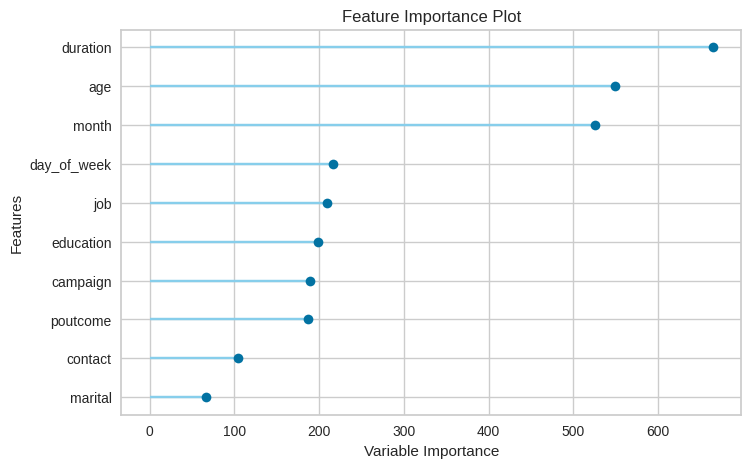

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9010,0.9132,0.4108,0.5865,0.4832,0.4303,0.4386
1,0.9029,0.9201,0.4714,0.5858,0.5224,0.4690,0.4725
2,0.8987,0.9341,0.4512,0.5630,0.5009,0.4453,0.4487
3,0.9063,0.9241,0.4781,0.6068,0.5348,0.4836,0.4878
4,0.9052,0.9249,0.4141,0.6181,0.4960,0.4459,0.4568
5,0.9169,0.9368,0.4848,0.6857,0.5680,0.5236,0.5332
6,0.9010,0.9220,0.4141,0.5857,0.4852,0.4322,0.4402
7,0.9108,0.9270,0.4512,0.6505,0.5328,0.4853,0.4952
8,0.9067,0.9257,0.4209,0.6281,0.5040,0.4547,0.4659


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
#num_folds=2

# initialize the environment and perform some preprocessing steps
clf1 = setup(data = df, target = target_column, train_size = 0.8)

# start a loop
models = []
results = []

for i in np.arange(0.1,1,0.1):
    model = create_model('lightgbm', learning_rate = i)
    model_results = pull().loc[['Mean']]
    models.append(model)
    results.append(model_results)

results = pd.concat(results, axis=0)
results.index = np.arange(0.1,1,0.1)
results.plot()

# compare models
best = compare_models()

# evaluate model
evaluate_model(best)

# plot feature importance
plot_model(best, plot = 'feature')

# create model
model = create_model(best)

# finalize model
pipeline = finalize_model(model)

In [8]:
# get the train and test data
X_train_transformed = get_config('X_train_transformed')
y_train_transformed = get_config('y_train_transformed')
X_test_transformed = get_config('X_test_transformed')
y_test_transformed = get_config('y_test_transformed')

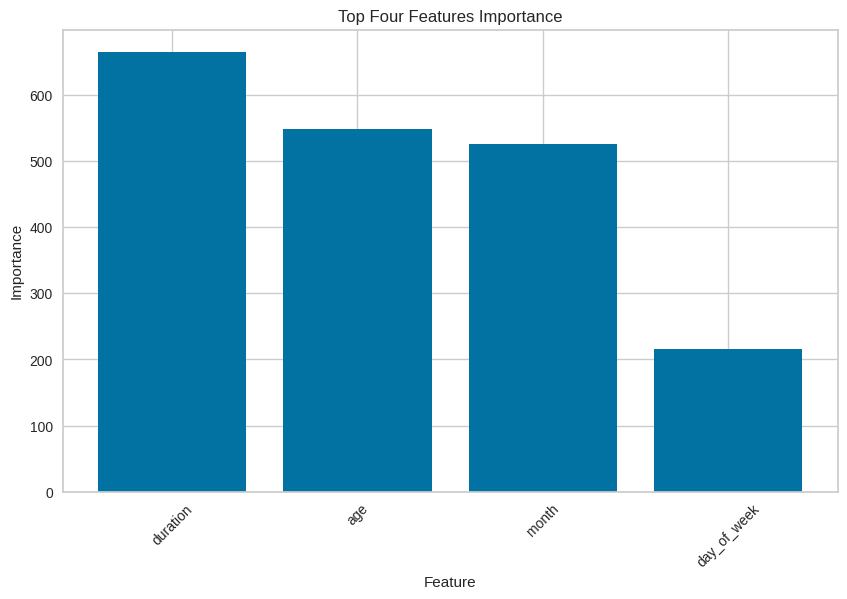

In [9]:
try:
    # use the feature importance attribute of the model
    feature_importance = pd.DataFrame({'Feature': X_test_transformed.columns, 'Importance': best.feature_importances_})
    top_four_features = feature_importance.nlargest(4, 'Importance')['Feature'].tolist()
except AttributeError:
    # use the permutation feature importance method
    result = permutation_importance(model, X_test_transformed, y_test_transformed, n_repeats=10, random_state=0)
    feature_importance = pd.DataFrame({'Feature': X_test_transformed.columns, 'Importance': result.importances_mean})
    # Assuming 'feature_importance' is a DataFrame with columns 'Feature' and 'Importance'
    top_four_features = feature_importance.nlargest(4, 'Importance')['Feature'].tolist()

# Plot the bar chart using the correct variable
plt.figure(figsize=(10, 6))
plt.bar(top_four_features, feature_importance.nlargest(4, 'Importance')['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top Four Features Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Extract feature names
feature1 = top_four_features[0]
feature2 = top_four_features[1]

##**Symmetries**

In [10]:
def calculate_symmetry(image_path):
    # Open the image
    img = imageio.imread(image_path)
    # Remove the alpha channel
    image_rgb = img[..., :3]

    # Convert the image to grayscale
    image_gray = skimage.color.rgb2gray(image_rgb)

    # Get the height and width of the grayscale image
    height, width = np.shape(image_gray)

    # Set a threshold value
    thrld = 0.1

    # Invert the grayscale image
    new_gray = 1. - image_gray
    new_gray = np.where(new_gray <= thrld, 0, new_gray)

    # Calculate the sum of pixel values in the thresholded grayscale image
    val_img = np.sum(new_gray)

    # Calculate vertical symmetry score
    left_half = new_gray[:, :width // 2].copy()

    right_half = new_gray[:, -(width // 2):].copy()

    # Create a mirror image of the right half
    right_half_flipped = np.fliplr(right_half)

    # Compute the absolute difference between left and flipped right halves
    diff = np.abs(left_half - right_half_flipped)

    # Threshold the difference image
    new_diff = np.where(diff <= thrld, 0, diff)

    # Calculate the vertical symmetry score
    vertical_score = 1 - (np.sum(new_diff) / val_img)

    # Calculate horizontal symmetry score
    top_half = new_gray[:height//2 , :].copy()

    bottom_half = new_gray[-(height//2): , :].copy()

    bottom_half_flipped = np.flipud(bottom_half)

    diff = np.abs(top_half-bottom_half_flipped)
    new_diff = np.where(diff <= thrld, 0 , diff)

    horizontal_score = 1 -(np.sum(new_diff) / val_img)

    # Calculate main oblique symmetry score
    image = PILImage.open(image_path)

    # Calculates the angle of rotation so that the diagonal of the graph is horizontal
    rad_angle = math.atan(height/width)
    grad_angle = -math.degrees(rad_angle)
    # Rotate original image
    oblique = image.rotate(grad_angle, expand=True)

    # Create a new white background with the same size as the rotated image
    white_background = PILImage.new("RGB", oblique.size, "white")

    # Overlay the rotated image on the new white background
    result_image = PILImage.alpha_composite(white_background.convert("RGBA"), oblique.convert("RGBA"))
    oimg = result_image.convert("L")

    # Convert image to greyscale
    image_gray = np.array(oimg)
    image_gray = 1. - image_gray / 255

    height_r, width_r = np.shape(image_gray)

    new_gray = np.where(image_gray <= thrld, 0 , image_gray)
    val_img = np.sum(new_gray)

    top_half = new_gray[:height_r//2 , :].copy()

    bottom_half = new_gray[-(height_r//2): , :].copy()

    bottom_half_flipped = np.flipud(bottom_half)

    diff = np.abs(top_half-bottom_half_flipped)

    new_diff = np.where(diff <= thrld, 0 , diff)

    oblique_m_score = 1 - (np.sum(new_diff) / val_img)

    # Calculate secondary oblique symmetry score
    grad_angle = -grad_angle
    # Rotate original image
    oblique = image.rotate(grad_angle, expand=True)

    # Create a new white background with the same size as the rotated image
    white_background = PILImage.new("RGB", oblique.size, "white")

    # Overlay the rotated image on the new white background
    result_image = PILImage.alpha_composite(white_background.convert("RGBA"), oblique.convert("RGBA"))

    # Convert image to greyscale
    oimg = result_image.convert("L")

    image_gray = np.array(oimg)
    image_gray = 1. - image_gray / 255

    new_gray = np.where(image_gray <= thrld, 0 , image_gray)
    val_img = np.sum(new_gray)

    top_half = new_gray[:height_r//2 , :].copy()
    height_h, width_h  = np.shape(top_half)

    bottom_half = new_gray[-(height_r//2): , :].copy()

    bottom_half_flipped = np.flipud(bottom_half)

    diff = np.abs(top_half-bottom_half_flipped)

    new_diff = np.where(diff <= thrld, 0 , diff)

    oblique_s_score = 1 - (np.sum(new_diff) / val_img)

    # Combine all scores into a single score
    combined_score = (vertical_score + horizontal_score + oblique_m_score + oblique_s_score) / 4

    return combined_score

In [11]:
def calculate_overlap(accepted, refused, background_a, background_r):
    # Open image for accepted
    image = PILImage.open(accepted)
    img = np.array(image, dtype=np.int16)
    # Remove the alpha channel
    rgb_accepted = img[..., :3]
    height, width, _ = np.shape(rgb_accepted)
    perc = 0.1

    # Open image for refused
    image = PILImage.open(refused)
    img = np.array(image, dtype=np.int16)
    # Remove the alpha channel
    rgb_refused = img[..., :3]

   # Based on the background colour, it selects points excluding those within the threshold defined by perc for accepted
    if background_a == 'black':
        lower_bound_a = np.array([[0, 0, 0]], dtype=np.int16)
        upper_bound_a =np.array([[math.floor(perc * 255), math.floor(perc * 255), math.floor(perc * 255)]], dtype=np.int16)
    elif background_a == 'blue':
        rgb_accepted_array = np.reshape(rgb_accepted, (-1, 3))
        brg_accepted_array = np.column_stack((rgb_accepted_array[:, 2], rgb_accepted_array[:, 0], rgb_accepted_array[:, 1]))

        # Creates a dictionary of unique tuples
        unique_accepted = np.unique(brg_accepted_array, axis=0)
        unique_dict_accepted = {i: unique_accepted[i] for i in range(len(unique_accepted))}

        list_accepted = list(unique_dict_accepted.items())
        list_accepted=[tup[1] for tup in list_accepted]

        lim=math.ceil(len(list_accepted)*perc)
        lim_blue = list_accepted[-lim:]
        b = [tup[0] for tup in lim_blue]
        b = np.array(b)

        r = [tup[1] for tup in lim_blue]
        r = np.array(r)

        g = [tup[2] for tup in lim_blue]
        g = np.array(g)

        lower_bound_a = np.array([[r.min(), g.min(), b.min()]], dtype=np.int16)
        upper_bound_a = np.array([[255, 255, 255]], dtype=np.int16)

    elif background_a == 'red':
        rgb_accepted_array = np.reshape(rgb_accepted, (-1, 3))
        rbg_accepted_array = np.column_stack((rgb_accepted_array[:, 0], rgb_accepted_array[:, 2], rgb_accepted_array[:, 1]))

        # Creates a dictionary of unique tuples
        unique_accepted = np.unique(rbg_accepted_array, axis=0)
        unique_dict_accepted = {i: unique_accepted[i] for i in range(len(unique_accepted))}

        list_accepted = list(unique_dict_accepted.items())
        list_accepted=[tup[1] for tup in list_accepted]

        lim=math.ceil(len(list_accepted)*perc)
        lim_red = list_accepted[-lim:]
        r = [tup[0] for tup in lim_red]
        r = np.array(r)

        b = [tup[1] for tup in lim_red]
        b = np.array(b)

        g = [tup[2] for tup in lim_red]
        g = np.array(g)

        lower_bound_a = np.array([[r.min(), g.min(), b.min()]], dtype=np.int16)
        upper_bound_a = np.array([[255, 255, 255]], dtype=np.int16)

    else:
        lower_bound_a = np.array([[math.floor((1-perc) * 255), math.floor((1-perc) * 255), math.floor((1-perc) * 255)]], dtype=np.int16)
        upper_bound_a = np.array([[255, 255, 255]], dtype=np.int16)

   # Based on the background colour, it selects points excluding those within the threshold defined by perc for refused
    if background_r == 'black':
        lower_bound_r = np.array([[0, 0, 0]], dtype=np.int16)
        upper_bound_r = np.array([[math.floor(perc * 255), math.floor(perc * 255), math.floor(perc * 255)]], dtype=np.int16)
    elif background_r == 'blue':
        rgb_rejected_array = np.reshape(rgb_refused, (-1, 3))
        brg_rejected_array = np.column_stack((rgb_rejected_array[:, 2], rgb_rejected_array[:, 0], rgb_rejected_array[:, 1]))

        # Create a dictionary of unique tuples
        unique_rejected = np.unique(brg_rejected_array, axis=0)
        unique_dict_rejected = {i: unique_accepted[i] for i in range(len(unique_accepted))}

        list_rejected = list(unique_dict_rejected.items())
        list_rejected=[tup[1] for tup in list_rejected]

        lim=math.ceil(len(list_rejected)*perc)
        lim_blue = list_rejected[-lim:]
        b = [tup[0] for tup in lim_blue]
        b = np.array(b)

        r = [tup[1] for tup in lim_blue]
        r = np.array(r)

        g = [tup[2] for tup in lim_blue]
        g = np.array(g)

        lower_bound_r = np.array([[r.min(), g.min(), b.min()]], dtype=np.int16)
        upper_bound_r = np.array([[255, 255, 255]], dtype=np.int16)

    elif background_r == 'red':
        rgb_rejected_array = np.reshape(rgb_refused, (-1, 3))
        rbg_rejected_array = np.column_stack((rgb_rejected_array[:, 0], rgb_rejected_array[:, 2], rgb_rejected_array[:, 1]))

        unique_rejected = np.unique(rbg_rejected_array, axis=0)
        unique_dict_rejected = {i: unique_rejected[i] for i in range(len(unique_rejected))}

        list_rejected = list(unique_dict_rejected.items())
        list_rejected=[tup[1] for tup in list_rejected]

        lim=math.ceil(len(list_rejected)*perc)
        lim_red = list_rejected[-lim:]
        r = [tup[0] for tup in lim_red]
        r = np.array(r)

        b = [tup[1] for tup in lim_red]
        b = np.array(b)

        g = [tup[2] for tup in lim_red]
        g = np.array(g)

        lower_bound_r = np.array([[r.min(), g.min(), b.min()]], dtype=np.int16)
        upper_bound_r = np.array([[255, 255, 255]], dtype=np.int16)

    else:
        lower_bound_r = np.array([[math.floor((1-perc) * 255), math.floor((1-perc) * 255), math.floor((1-perc) * 255)]], dtype=np.int16)
        upper_bound_r = np.array([[255, 255, 255]], dtype=np.int16)

    # Calculate
    # Take the average difference across the red and green color channels
    # Verify the cells that belong to the background (true)
    condition_bound_accepted = np.all((lower_bound_a <= rgb_accepted) & (rgb_accepted <= upper_bound_a), axis=-1)
    # Add a dimension for the correct transmission
    condition_bound_accepted = np.expand_dims(condition_bound_accepted, axis=-1)

    condition_bound_refused = np.all((lower_bound_r <= rgb_refused) & (rgb_refused <= upper_bound_r), axis=-1)
    condition_bound_refused = np.expand_dims(condition_bound_refused, axis=-1)
    # Compute the values of the pixels that do not belong to the background and that can be overlapped
    max_overlap = min(np.count_nonzero(~(condition_bound_accepted)), np.count_nonzero(~(condition_bound_refused)))

    overlap = 1 - np.count_nonzero(~(condition_bound_accepted | condition_bound_refused)) / max_overlap

    return  overlap

In [12]:
def closure_1(graph_obj, frequencies, frequencies_unique):
    # Initialise area size list
    areas = []
    # Set percentiles for frequencies to group similar nuances
    percentili = [0, 20, 50, 100]
    freq_sel = 0

    for i in range(len(percentili)):
        # If 0 I calculate the maximum area
        if i == 0:
            new_frequencies = np.ones_like(frequencies) * frequencies.max()
        else:
            low_limit = freq_sel+1
            up_limit = int(np.percentile(frequencies_unique,percentili[i]))
            freq_sel=up_limit
            new_frequencies = np.where((frequencies >= low_limit) & (frequencies <= up_limit), frequencies.max(), 0)
        graph_obj.set_array(new_frequencies)
        buffer = io.BytesIO()
        # I save the graph to a temporary memory
        plt.savefig(buffer, format='png', bbox_inches='tight')
        buffer.seek(0)

        image = imageio.imread(buffer)
        buffer.close()

        # Remove the alpha channel
        image_rgb = image[..., :3]

        # Convert the image to grayscale
        image_gray = skimage.color.rgb2gray(image_rgb)

        edges = skimage.feature.canny(
            image=image_gray,
            sigma=0.1,
            low_threshold=0.1,
            high_threshold=0.2,
        )
        closed_edges = binary_closing(edges)
        labels = measure.label(closed_edges)

        # Get the grayscale value of the white color (assuming it's 1.0)
        non_white = 0.5

        # Create a mask for the white regions
        white_mask = np.where(image_gray >= non_white, 1, 0)

        # Exclude the white regions from the labels
        labels = labels * (1 - white_mask)    # Label the distinct areas

        # Measure the size of each area
        # Count the number of distinct areas
        num_areas = labels.max()


        # Measure the size of each area
        props = measure.regionprops(labels)
        sizes = [prop.area for prop in props]

        if i == 0:
            max_area = sizes[0]
        else:
            areas.append(sizes)
            total_area = sum(sizes)

    areas_list = list(chain(*areas))
    return areas_list, max_area

In [13]:
def closure_2(path):
    image = imageio.imread(path)

    # Remove the alpha channel
    image_rgb = image[..., :3]

    # Convert the image to grayscale
    image_gray = skimage.color.rgb2gray(image_rgb)

    edges = skimage.feature.canny(
        image=image_gray,
        sigma=0.05,
        low_threshold=0.1,
        high_threshold=0.3,
    )
    closed_edges = binary_closing(edges)
    labels = measure.label(closed_edges)

    # Get the grayscale value of the white color (assuming it's 1.0)
    non_white = 0.5

    # Create a mask for the white regions
    white_mask = np.where(image_gray >= non_white, 1, 0)

    # Exclude the white regions from the labels
    labels = labels * (1 - white_mask)    # Label the distinct areas

    # Measure the size of each area
    # Count the number of distinct areas
    num_areas = labels.max()


    # Measure the size of each area
    props = measure.regionprops(labels)
    sizes = [prop.area for prop in props]

    return sizes


In [14]:
def proximity_1(verts, frequency, perc):

    # Calculate the frequency relative to the percentile perc to exclude figures that are too faded
    min_density = np.percentile(frequency, perc)

    # Filter indices based on density
    valid_index = np.where(frequency > min_density)[0]

    # Select valid figure indices
    valid_verts = verts[valid_index]

    # Initialising the list of distances
    distances = []

    # Set the number of iterations
    cycle = valid_verts.shape[0] - 1

    for i in range(cycle):

        # Fit the model
        nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(valid_verts)

        # Compute distances and indices of nearest neighbors
        distance, indices = nbrs.kneighbors(valid_verts)

        # The nearest distance of the first figure is added to the list of distances
        distances.append(distance[0][1])

        # Eliminate the first centre
        valid_verts = valid_verts[1:]
    return distances

In [15]:
class DataViz2:
    def __init__(self, data):
        self.data = data

    def scatter_plot(self, feature1, feature2):

        # Separate the data into accepted and refused loans
        accepted = self.data[self.data[target_column] == 1]
        refused = self.data[self.data[target_column] == 0]
        fig, ax = plt.subplots(figsize=(12, 10))

        # Create the scatter plot with different colors for accepted and refused loans
        ax.scatter(accepted[feature1], accepted[feature2], color='blue', alpha=0.9, label='Positive Evaluation')
        ax.scatter(refused[feature1], refused[feature2], color='red', alpha=0.4, label='Negative Evaluation')

        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)

        if l_dict:
            if len(label_dict.get(feature1, []))>0:
                lim = plt.gca().get_xlim()
                xlim = tuple(int(x) for x in lim)
                plt.xticks(list(range(xlim[0], xlim[1]+1)), label_dict[feature1][1][xlim[0]: xlim[1]+1], rotation=90)

            if len(label_dict.get(feature2, []))>0:
                lim = plt.gca().get_ylim()
                ylim = tuple(int(y) for y in lim)
                plt.yticks(list(range(ylim[0], ylim[1]+1)), label_dict[feature2][1][ylim[0]: ylim[1]+1])

        ax.legend()

        # Save the complete plot with axes and labels
        fig.savefig('scatter.png')
        plt.axis('off')
        ax.legend().remove()
        fig.savefig('scatter_both.png', bbox_inches='tight', pad_inches = 0)
        plt.close()
        # View the graph created
        img = imageio.imread('scatter.png')
        fig, ax = plt.subplots(figsize=(12, 10))
        ax.imshow(img)
        plt.axis('off')
        plt.show()

        # Create the scatter plot for accepted loans
        fig_accepted, ax_accepted = plt.subplots(figsize=(12, 10))
        ax_accepted.scatter(accepted[feature1], accepted[feature2], color='blue', alpha=1.0)
        ax_accepted.axis('off')
        fig_accepted.savefig( 'scatter_accepted.png', bbox_inches='tight', pad_inches = 0)
        plt.close(fig_accepted)

        # Create the scatter plot for refused loans
        fig_rejected, ax_rejected = plt.subplots(figsize=(12, 10))
        ax_rejected.scatter(refused[feature1], refused[feature2], color='red', alpha=1.0)
        ax_rejected.axis('off')
        fig_rejected.savefig('scatter_rejected.png', bbox_inches='tight', pad_inches = 0)
        plt.close(fig_rejected)

        image = imageio.imread('scatter_accepted.png')

        # PROXIMITY

        # Calculate the distance between each accepted point and its nearest accepted neighbor (normalized)
        accepted_points = accepted[[feature1, feature2]].values
        max_values = np.amax(accepted_points, axis=0)
        min_values = np.amin(accepted_points, axis=0)
        accepted_normalized = accepted_points / max_values
        neighbors = NearestNeighbors(n_neighbors=2).fit(accepted_normalized)
        distances, indices = neighbors.kneighbors(accepted_normalized)

        # The first column of 'distances' is the distance to the point itself (always 0),
        # so we take the second column
        nearest_neighbor_distances = distances[:, 1]

        # Compute the minimum, maximum, and average distance
        min_distance = np.min(nearest_neighbor_distances)
        max_distance = np.max(nearest_neighbor_distances)
        average_distance = np.mean(nearest_neighbor_distances)

        # Compute the distances in case the point are equidistributed within the graph
        num_points = accepted_points.size
        x_max, y_max = max_values[0], max_values[1]
        x_min, y_min = min_values[0], min_values[1]
        points_per_row = int(np.sqrt(num_points))
        x_step = (x_max - x_min) / points_per_row
        y_step = (y_max - y_min) / points_per_row
        d = np.sqrt(x_step**2 + y_step**2)
        d_max = np.sqrt((x_max)**2 + (y_max)**2)
        d_norm = d / d_max

        # Compute the proximity score
        proximity = 1 - abs(average_distance - min_distance) / abs(d_norm - min_distance)


        # CLOSURE
        areas_blue = closure_2('scatter_accepted.png')
        areas_red = closure_2('scatter_rejected.png')

        # Compute the total area for each class in order to normalize
        total_area_blue = sum(areas_blue)
        total_area_red = sum(areas_red)

        # Calculate the largest area for red and green separately
        largest_area_red = max(areas_red)
        largest_area_blue = max(areas_blue)

        # Calculate standard deviation for red and green separately
        std_dev_red = np.std(areas_red)/((max(areas_red)-min(areas_red))/2) if len(areas_red) > 1 else 1
        std_dev_blue = np.std(areas_blue)/((max(areas_blue)-min(areas_blue))/2) if len(areas_blue) > 1 else 1

        # Calculate closure score for red and green separately
        closure_score_red = (largest_area_red / total_area_red) * std_dev_red
        closure_score_blue = (largest_area_blue / total_area_blue) * std_dev_blue

        closure_value = (closure_score_red + closure_score_blue)/2

        #SYMMETRY
        symmetry_score=calculate_symmetry('scatter_both.png')

        # OVERLAPPING
        overlap_score = calculate_overlap('scatter_accepted.png', 'scatter_rejected.png', 'white', 'white')

        total_score = closure_value + proximity + symmetry_score + overlap_score

        # Return a dictionary with the metrics

        print({
            'closure': closure_value,
            'proximity': proximity,
            'symmetry': symmetry_score,
            'overlapping': overlap_score
        })

        return [proximity, closure_value, symmetry_score, overlap_score]


    def histogram(self, feature1, feature2):

        def compute_limit(df, feature, percentage):
            # If feature takes on more values than the expected number of rectangles by setting perc
            if df[feature].nunique() > 100/percentage:
                min_val = df[feature].min()
                max_val = df[feature].max()*1.000001
                range_val = max_val - min_val
                step = range_val * percentage / 100
                min = np.min(df[feature]) // step * step
                max = (np.max(df[feature]) + step - 1) // step * step + 1
            else:
                min = data[feature].min()
                max = data[feature].max()
                step = 0
            return step, min, max

        def compute_centers(verts):
            centers=[]
            for vert in verts:
                l = ((vert.vertices[1][0] - vert.vertices[0][0]) / 2) + vert.vertices[0][0]
                h = ((vert.vertices[2][1] - vert.vertices[0][1]) / 2) + vert.vertices[0][1]
                centers.append([l, h])
            return centers

        # Complete graph

        data = self.data[[feature1, feature2, target_column]].copy()
        data[target_column] = data[target_column].replace(0, -1)
        target_max = data[target_column][data[target_column] > 0].sum()
        target_min = data[target_column][data[target_column] < 0].sum()

        step1, min_feature1, max_feature1 = compute_limit(data, feature1, 10)
        step2, min_feature2, max_feature2 = compute_limit(data, feature2, 10)

        # Bin 'feature1' and 'feature2' into categories
        if step1 > 0:
            data[feature1] = pd.cut(data[feature1], bins=np.arange(min_feature1, max_feature1, step1), right=False)
        else:
            data[feature1] = pd.cut(data[feature1], bins=np.arange(min_feature1, max_feature1 + 2, 1), right=False)

        if step2 > 0:
            data[feature2] = pd.cut(data[feature2], bins=np.arange(min_feature2, max_feature2, step2), right=False)
        else:
            data[feature2] = pd.cut(data[feature2], bins=np.arange(min_feature2, max_feature2 + 2, 1), right=False)

        feature1_categories = data[feature1].cat.categories
        feature2_categories = data[feature2].cat.categories

        hist_accepted = None
        hist_rejected = None

        for loan_approval, color_map, alpha in [(1, 'Blues', 0.9), (0, 'Reds', 0.5)]:
            subset = self.data[self.data[target_column] == loan_approval]
            subset[feature1] = np.sort(subset[feature1])
            subset[feature2] = np.sort(subset[feature2])

            # Bin 'feature1' and 'feature2' into categories
            subset[feature1] = pd.cut(subset[feature1], bins=feature1_categories, right=False)
            subset[feature2] = pd.cut(subset[feature2], bins=feature2_categories, right=False)

            xy_subset = np.column_stack((subset[feature1].cat.codes, subset[feature2].cat.codes))
            hist_subset = [len(xy_subset[(xy_subset == np.array([x, y])).all(axis=1)])for y in range(len(feature2_categories)-1, -1, -1) for x in range(len(feature1_categories))]
            hist_subset = np.array(hist_subset).reshape(len(feature2_categories), len(feature1_categories))

            if loan_approval == 1:
                hist_accepted = hist_subset
            else:
                hist_rejected = hist_subset

        # Create a plot for both accepted and rejected loans
        fig_both, ax_both = plt.subplots(figsize=(12, 10))
        cmap_accepted = plt.get_cmap('Blues')
        cmap_rejected = plt.get_cmap('Reds')

        ax_both.pcolormesh(hist_accepted, cmap=cmap_accepted, edgecolors='white', linewidths=2)
        ax_both.pcolormesh(hist_rejected, cmap=cmap_rejected, alpha=0.5, edgecolors='white', linewidths=2)
        ax_both.set_xticks(np.arange(len(feature1_categories)))
        ax_both.set_xticklabels([str(category) for category in feature1_categories], rotation=45)
        ax_both.set_yticks(np.arange(len(feature2_categories)))
        ax_both.set_yticklabels([str(category) for category in feature2_categories])
        ax_both.set_xlabel(feature1)
        ax_both.set_ylabel(feature2)

        if l_dict:
            if len(label_dict.get(feature1, []))>0:
                ax_both.set_xlim(0, max_feature1 + 0.9)
                lim = plt.gca().get_xlim()
                xlim = tuple(int(x) for x in lim)
                plt.xticks([x + 0.5 for x in list(range(xlim[0], xlim[1]+1))], label_dict[feature1][1][xlim[0]: xlim[1]+1], rotate=45)

            if len(label_dict.get(feature2, []))>0:
                ax_both.set_ylim(0, max_feature2 + 0.9)
                lim = plt.gca().get_ylim()
                ylim = tuple(int(y) for y in lim)
                plt.yticks([y + 0.5 for y in list(range(ylim[0], ylim[1]+1))], label_dict[feature2][1][ylim[0]: ylim[1]+1])

        plt.savefig('histogram.png')
        plt.axis('off')
        plt.savefig('histogram_both.png', bbox_inches='tight', pad_inches = 0)
        plt.close()
        # View the graph created
        img = imageio.imread('histogram.png')
        fig, ax = plt.subplots(figsize=(12, 10))
        ax.imshow(img)
        plt.axis('off')
        plt.show()

        # Create a plot for only accepted loans
        fig_accepted, ax_accepted = plt.subplots(figsize=(12, 10))
        cmap = plt.get_cmap('Blues')
        ax1 = ax_accepted.pcolormesh(hist_accepted, cmap=cmap, edgecolors='white', linewidths=2)
        ax_accepted.set_xticks(np.arange(len(feature1_categories)))
        ax_accepted.set_xticklabels([str(category) for category in feature1_categories])
        ax_accepted.set_yticks(np.arange(len(feature2_categories)))
        ax_accepted.set_yticklabels([str(category) for category in feature2_categories])
        ax_accepted.set_xlabel(feature1)
        ax_accepted.set_ylabel(feature2)
        plt.axis('off')
        plt.savefig('histogram_accepted.png', bbox_inches='tight', pad_inches = 0)

        # Retrieves the vertices of rectangles
        list_paths = ax1.get_paths()
        # Calculate the coordinates of the centres
        hist_centers = compute_centers(list_paths)
        # Access to the Axes object associated with the pcolormesh graph
        axes = plt.gca()
        # Conversion of graph co-ordinates to screen co-ordinates
        screen_point = axes.transData.transform(hist_centers)
        # Calculate the maximum distance between the rectangles
        max_his_dist = math.sqrt((screen_point[-1, 0] - screen_point[0, 0])**2 +
                                 (screen_point[-1, 1] - screen_point[0, 1])**2)

        # Retrieves frequencies associated with rectangles
        frequencies = ax1.get_array()

        # Calculate how many unique frequnces there are
        frequencies_unique = np.unique(frequencies)

        # CLOUSURE POISTIVES
        areas_array, max_area = closure_1(ax1, frequencies, frequencies_unique)
        plt.close('all')

        total_area = sum(areas_array)
        # Calculate the largest area for accepted and rejected separately
        largest_area = max(areas_array)

        # Calculate standard deviation for blu and red separately
        std_dev = np.std(areas_array)/((max(areas_array)-min(areas_array))/2) if len(areas_array) > 1 else 1

        # Calculate closure score for accepted and rejected separately
        closure_score_positive = (largest_area / total_area) * std_dev

        # PROXIMITY POSITIVES
        dist = proximity_1(screen_point, frequencies, perc=5)

        # Normalize distances with image diagonal
        normalized_distances = np.array(dist) / max_his_dist
        min_distance = np.min(normalized_distances)
        max_distance = np.max(normalized_distances)

        # Calculate mean of distances
        average_distance = np.mean(normalized_distances)

        # Calculate standard deviation of distances
        std_distance = np.std(normalized_distances)

        # Calculate percentiles of normalized distances
        min_ratio = np.percentile(normalized_distances, 5)
        max_ratio = np.percentile(normalized_distances, 95)

        # Calculate percentages of points too close or too distant to their nearest neighbors
        too_close = len(np.where(normalized_distances <= min_ratio)[0]) / len(dist)
        too_distance = len(np.where(normalized_distances >= max_ratio)[0]) / len(dist)

        # Calculate proximity score
        proximity_accepted_score = (min_distance + max_distance + average_distance + (1 - too_close) + (1 - too_distance) +
                                    std_distance) / 6

        # Create a plot for only rejected loans
        fig_rejected, ax_rejected = plt.subplots(figsize=(12, 10))
        cmap = plt.get_cmap('Reds')
        ax2 = ax_rejected.pcolormesh(hist_rejected, cmap=cmap, edgecolors='white', linewidths=2)
        ax_rejected.set_xticks(np.arange(len(feature1_categories)))
        ax_rejected.set_xticklabels([str(category) for category in feature1_categories])
        ax_rejected.set_yticks(np.arange(len(feature2_categories)))
        ax_rejected.set_yticklabels([str(category) for category in feature2_categories])
        ax_rejected.set_xlabel(feature1)
        ax_rejected.set_ylabel(feature2)
        plt.axis('off')
        plt.savefig('histogram_rejected.png', bbox_inches='tight', pad_inches = 0)

        # Retrieves frequencies associated with rectangles
        list_paths = ax2.get_paths()
        # Calculate the coordinates of the centres
        hist_centers = compute_centers(list_paths)
        # Access to the Axes object associated with the pcolormesh graph
        axes = plt.gca()
        # Conversion of graph co-ordinates to screen co-ordinates
        screen_point = axes.transData.transform(hist_centers)

        # Retrieves frequencies associated with rectangles
        frequencies = ax2.get_array()
        # Calculate how many unique frequnces there are
        frequencies_unique = np.unique(frequencies)

        # CLOUSURE NEGATIVE
        areas_array, max_area = closure_1(ax2, frequencies, frequencies_unique)
        plt.close('all')

        total_area = sum(areas_array)
        # Calculate the largest area for accepted and rejected separately
        largest_area = max(areas_array)

        # Calculate standard deviation for blu and red separately
        std_dev = np.std(areas_array)/((max(areas_array)-min(areas_array))/2) if len(areas_array) > 1 else 1

        # Calculate closure score for accepted and rejected separately
        closure_score_negative = (largest_area / total_area) * std_dev

        closure_score = (closure_score_positive + closure_score_negative)/2

        # PROXIMITY NEGATIVES
        dist = proximity_1(screen_point, frequencies, perc=5)

        # Normalize distances with image diagonal
        normalized_distances = np.array(dist) / max_his_dist
        min_distance = np.min(normalized_distances)
        max_distance = np.max(normalized_distances)

        # Calculate mean of distances
        average_distance = np.mean(normalized_distances)

        # Calculate standard deviation of distances
        std_distance = np.std(normalized_distances)

        # Calculate percentiles of normalized distances
        min_ratio = np.percentile(normalized_distances, 5)
        max_ratio = np.percentile(normalized_distances, 95)

        # Calculate percentages of points too close or too distant to their nearest neighbors
        too_close = len(np.where(normalized_distances <= min_ratio)[0]) / len(dist)
        too_distance = len(np.where(normalized_distances >= max_ratio)[0]) / len(dist)

        # Calculate proximity score
        proximity_rejected_score = (min_distance + max_distance + average_distance + (1 - too_close) + (1 - too_distance) +
                                    std_distance) / 6

        #print('proximity score', proximity_rejected_score)

        proximity_score = (proximity_accepted_score + proximity_rejected_score) / 2

        # SYMMETRY
        symmetry_score = calculate_symmetry('histogram_both.png')

        # OVERLAPPING
        overlap_score = calculate_overlap('histogram_accepted.png', 'histogram_rejected.png', 'blue', 'red')


        total_score=closure_score+proximity_score+symmetry_score+overlap_score

        print({
            'closure': closure_score,
            'proximity': proximity_score,
            'symmetry': symmetry_score,
            'overlap' : overlap_score
        })

        return [proximity_score, closure_score, symmetry_score, overlap_score]



    def heatmap(self, feature1, feature2):

        # Compute the graph for the complete heatmap, the heatmap without axis, the heatmap of the only accepted points, and the heatmap of only the rejected points
        data = self.data[[feature1, feature2, target_column]].copy()
        data[target_column] = data[target_column].replace(0, -1)
        target_max = data[target_column][data[target_column] > 0].sum()
        target_min = data[target_column][data[target_column] < 0].sum()

        def compute_limit(df, feature, percentage):
            if df[feature].nunique() > 100/percentage:
                min_val = df[feature].min()
                max_val = df[feature].max()*1.000001
                range_val = max_val - min_val
                step = range_val * percentage / 100
                min = np.min(df[feature]) // step * step
                max = (np.max(df[feature]) + step - 1) // step * step + 1
            else:
                min = data[feature].min()
                max = data[feature].max()
                step = 0
            return step, min, max

        step1, min_feature1, max_feature1 = compute_limit(data, feature1, 10)
        step2, min_feature2, max_feature2 = compute_limit(data, feature2, 10)

        # Bin 'feature1' and 'feature2' into categories
        if step1 > 0:
            data[feature1] = pd.cut(data[feature1], bins=np.arange(min_feature1, max_feature1, step1), right=False)
        else:
            data[feature1] = pd.cut(data[feature1], bins=np.arange(min_feature1, max_feature1 + 2, 1), right=False)

        if step2 > 0:
            data[feature2] = pd.cut(data[feature2], bins=np.arange(min_feature2, max_feature2, step2), right=False)
        else:
            data[feature2] = pd.cut(data[feature2], bins=np.arange(min_feature2, max_feature2 + 2, 1), right=False)

        # Creating a pivot table with target sum (considering the sign)
        pivot_table_all = pd.pivot_table(data, values=target_column, index=feature2, columns=feature1, aggfunc='sum')

        # Calculate the absolute value while keeping the sign
        pivot_table_norm = pivot_table_all.applymap(lambda x: x / target_max if x > 0 else -x / target_min)

        # Create the complete heatmap
        plt.figure(figsize=(12, 10))

        # Creating a pivot table with absolute value
        pivot_table_abs = pivot_table_norm.abs()

        # Creating a heatmap with seaborn with absolute format in annotations
        ax_complete = sns.heatmap(pivot_table_norm, annot=pivot_table_abs.applymap(lambda x: f"{abs(x):.2f}"), fmt="", cmap='RdBu', linewidths=1.0, cbar_kws={'label': 'All Loans'}, center=0)

        # Invert y-axis
        ax_complete.invert_yaxis()

        if l_dict:
            if len(label_dict.get(feature1, []))>0:
                ax_complete.set_xlim(0, max_feature1 + 0.9)
                lim = plt.gca().get_xlim()
                xlim = tuple(int(x) for x in lim)
                plt.xticks([x + 0.5 for x in list(range(xlim[0], xlim[1]+1))], label_dict[feature1][1][xlim[0]: xlim[1]+1], rotate=90)

            if len(label_dict.get(feature2, []))>0:
                ax_complete.set_ylim(0, max_feature2 + 0.9)
                lim = plt.gca().get_ylim()
                ylim = tuple(int(y) for y in lim)
                plt.yticks([y + 0.5 for y in list(range(ylim[0], ylim[1]+1))], label_dict[feature2][1][ylim[0]: ylim[1]+1])

        # Save the complete heatmap
        ax_complete.figure.savefig('heatmap.png')
        # Removing the colour bar
        ax_complete.collections[0].colorbar.remove()
        # Hiding annotations
        for text in ax_complete.texts:
            text.set_visible(False)
        plt.axis('off')
        ax_complete.figure.savefig('heatmap_both.png', bbox_inches='tight', pad_inches=0)
        plt.close()
        # View the graph created
        img = imageio.imread('heatmap.png')
        fig, ax = plt.subplots(figsize=(12, 10))
        ax.imshow(img)
        plt.axis('off')
        plt.show()

        num_rows, num_cols = pivot_table_all.shape

        # Calculate the centre points of the bars
        center_x = range(num_cols)
        center_y = range(num_rows)
        centroids_all = []

        for x in center_x:
            for y in center_y:
                center_x_data = x + 0.5
                center_y_data = y + 0.5
                center_x_real, center_y_real = ax_complete.transData.transform([center_x_data, center_y_data])
                centroids_all.append((center_x_real, center_y_real))
        # Calculate the maximum distance
        image_diagonal = math.sqrt((centroids_all[0][0]-centroids_all[num_cols*num_rows-1][0])**2+(centroids_all[0][1]-centroids_all[num_cols*num_rows-1][1])**2)

        # Create the accepted heatmap
        data[target_column] = data[target_column].replace(-1, 0)

        # Creating a pivot table with target sum (considering the sign)
        pivot_table_positive = pd.pivot_table(data, values=target_column, index=feature2, columns=feature1, aggfunc='sum')

        # Calculate the absolute value while keeping the sign
        pivot_table_norm = pivot_table_positive.applymap(lambda x: x / target_max if x > 0 else -x / target_min)

        # Heatmap dimensions
        plt.figure(figsize=(12, 10))

        # Create heatmap with seaborn
        ax_positive = sns.heatmap(pivot_table_norm, cmap='RdBu', linewidths=1.0, cbar=None, center=0)

        # Invert y-axis
        ax_positive.invert_yaxis()
        # Show the plot without axes and legend
        plt.axis('off')

        for x in center_x:
            for y in center_y:
                center_x_data = x + 0.5
                center_y_data = y + 0.5
                center_x_real, center_y_real = ax_positive.transData.transform([center_x_data, center_y_data])
                centroids_all.append((center_x_real, center_y_real))

        # Save the heatmap for accepted loans
        ax_positive.figure.savefig('heatmap_positive.png', bbox_inches='tight', pad_inches=0)
        frequencies = np.round([ax_positive.collections[0].get_array() * 100])
        frequencies = frequencies.astype(int).reshape(-1)
        frequencies_unique = np.unique(frequencies)
        plt.close()

        # PROXIMITY POSITIVES
        dist = proximity_1(np.array(centroids_all), frequencies, perc=5)

        # Normalize distances with image diagonal
        normalized_distances = np.array(dist) / image_diagonal
        min_distance = np.min(normalized_distances)
        max_distance = np.max(normalized_distances)

        # Calculate mean of distances
        average_distance = np.mean(normalized_distances)

        # Calculate standard deviation of distances
        std_distance = np.std(normalized_distances)

        # Calculate percentiles of normalized distances
        min_ratio = np.percentile(normalized_distances, 5)
        max_ratio = np.percentile(normalized_distances, 95)

        # Calculate percentages of points too close or too distant to their nearest neighbors
        too_close = len(np.where(normalized_distances <= min_ratio)[0]) / len(dist)
        too_distance = len(np.where(normalized_distances >= max_ratio)[0]) / len(dist)

        # Calculate proximity score
        proximity_positive_score = (min_distance + max_distance + average_distance + (1 - too_close) + (1 - too_distance) +
                                    std_distance) / 6

        # CLOUSURE POISTIVES
        mat = np.zeros((num_rows, num_cols))
        _, h2d = plt.subplots(figsize=(12, 10))
        # Create a pcolormesh with the same dimension to use closure_1 function
        h2d = plt.pcolormesh(mat , cmap='Blues', vmin=min(frequencies), vmax=max(frequencies), edgecolors='white', linewidths=2)
        plt.axis('off')

        areas_array, max_area = closure_1(h2d, frequencies, frequencies_unique)
        plt.close('all')

        total_area = sum(areas_array)
        # Calculate the largest area for accepted and rejected separately
        largest_area = max(areas_array)

        # Calculate standard deviation for blu and red separately
        std_dev = np.std(areas_array)/((max(areas_array)-min(areas_array))/2) if len(areas_array) > 1 else 1

        # Calculate closure score for accepted and rejected separately
        closure_score_positive = (largest_area / total_area) * std_dev

        # Create the rejected heatmap
        data[target_column] = [x-1 for x in data[target_column]]

        # Creating a pivot table with target sum (considering the sign)
        pivot_table_negative = pd.pivot_table(data, values=target_column, index=feature2, columns=feature1, aggfunc='sum')

        # Calculate the absolute value while keeping the sign
        pivot_table_norm = pivot_table_negative.applymap(lambda x: x / target_max if x > 0 else -x / target_min)

        pivot_table_abs = pivot_table_norm.abs()

        # Create the complete heatmap
        plt.figure(figsize=(12, 10))

        # Create heatmap with seaborn
        ax_negative = sns.heatmap(pivot_table_norm, cmap='RdBu', linewidths=1.0, cbar=None, center=0)

        # Invert y-axis
        ax_negative.invert_yaxis()

        for x in center_x:
            for y in center_y:
                center_x_data = x + 0.5
                center_y_data = y + 0.5
                center_x_real, center_y_real = ax_negative.transData.transform([center_x_data, center_y_data])
                centroids_all.append((center_x_real, center_y_real))

        # Show the plot without axes and legend
        plt.axis('off')

        # Save the heatmap for accepted loans
        ax_negative.figure.savefig('heatmap_negative.png', bbox_inches='tight', pad_inches=0)
        frequencies = np.abs(np.round([ax_negative.collections[0].get_array() * 100]))
        frequencies = frequencies.astype(int).reshape(-1)
        frequencies_unique = np.unique(frequencies)
        plt.close()

        mat = np.ones((num_rows, num_cols))
        _, h2d = plt.subplots(figsize=(12, 10))
        # Create a pcolormesh with the same dimension to use closure_1 function
        h2d = plt.pcolormesh(mat , cmap='Blues', vmin=min(frequencies), vmax=max(frequencies), edgecolors='white', linewidths=2)
        plt.axis('off')

        # PROXIMITY NEGATIVES
        dist = proximity_1(np.array(centroids_all), frequencies, perc=5)

        # Normalize distances with image diagonal
        normalized_distances = np.array(dist) / image_diagonal
        min_distance = np.min(normalized_distances)
        max_distance = np.max(normalized_distances)

        # Calculate mean of distances
        average_distance = np.mean(normalized_distances)

        # Calculate standard deviation of distances
        std_distance = np.std(normalized_distances)

        # Calculate percentiles of normalized distances
        min_ratio = np.percentile(normalized_distances, 5)
        max_ratio = np.percentile(normalized_distances, 95)

        # Calculate percentages of points too close or too distant to their nearest neighbors
        too_close = len(np.where(normalized_distances <= min_ratio)[0]) / len(dist)
        too_distance = len(np.where(normalized_distances >= max_ratio)[0]) / len(dist)

        # Calculate proximity score
        proximity_negative_score = (min_distance + max_distance + average_distance + (1 - too_close) + (1 - too_distance) +
                                    std_distance) / 6

        # CLOUSURE NEGATIVES
        areas_array, max_area = closure_1(h2d, frequencies, frequencies_unique)
        plt.close('all')

        total_area = sum(areas_array)
        # Calculate the largest area for accepted and rejected separately
        largest_area = max(areas_array)

        # Calculate standard deviation for blu and red separately
        std_dev = np.std(areas_array)/((max(areas_array)-min(areas_array))/2) if len(areas_array) > 1 else 1

        # Calculate closure score for accepted and rejected separately
        closure_score_negative = (largest_area / total_area) * std_dev

        closure_score = (closure_score_positive + closure_score_negative)/2

        proximity_score = (proximity_positive_score + proximity_negative_score) / 2

        # SYMMETRY
        symmetry_score = calculate_symmetry('heatmap_both.png')

        # OVERLAPPING
        overlap_score = calculate_overlap('heatmap_positive.png', 'heatmap_negative.png', 'white', 'white')

        # Compute the metrics for the graph
        closure_value = closure_score
        proximity_value = proximity_score
        symmetry_value = symmetry_score

        total_score=closure_score+proximity_score+symmetry_score+overlap_score

        print({
            'closure': closure_value,
            'proximity': proximity_value,
            'symmetry': symmetry_value,
            'overlap' : overlap_score
        })


        return [proximity_score, closure_value, symmetry_score, overlap_score]


    def hexbin_plot(self, category1, category2):

        accepted = self.data[self.data[target_column] == 1]

        rejected = self.data[self.data[target_column] == 0]


        # Calculate the same x- and y-axis limits for both accepted and rejected graphs
        x_min = min(accepted[category1].min(), rejected[category1].min())
        x_max = max(accepted[category1].max(), rejected[category1].max())
        y_min = min(accepted[category2].min(), rejected[category2].min())
        y_max = max(accepted[category2].max(), rejected[category2].max())


        # Set gridsize dimension
        gridsize = 10

        # Plot the complete graph
        _, ax = plt.subplots(figsize=(12, 10))
        plt.tight_layout()
        extent = [x_min, x_max, y_min, y_max]
        _ = ax.hexbin(accepted[category1], accepted[category2], gridsize=gridsize, cmap='Blues', alpha=0.5, extent=extent )
        _ = ax.hexbin(rejected[category1], rejected[category2], gridsize=gridsize, cmap='Reds', alpha=0.5, extent=extent)

        # Add axis labels
        ax.set_xlabel(category1)
        ax.set_ylabel(category2)

        if l_dict:
            if len(label_dict.get(category1, []))>0:
                ax.set_xlim(0, self.data[category1].max() + 0.9)
                lim = plt.gca().get_xlim()
                xlim = tuple(int(x) for x in lim)
                plt.xticks([x + 0.5 for x in list(range(xlim[0], xlim[1]+1))], label_dict[feature1][1][xlim[0]: xlim[1]+1], rotate=45)

            if len(label_dict.get(category2, []))>0:
                lim = plt.gca().get_ylim()
                ylim = tuple(int(y) for y in lim)
                plt.yticks(label_dict[feature2][0][:], label_dict[feature2][1][:])

        plt.savefig('hexbin.png')
        plt.axis('off')
        plt.savefig('hexbin_both.png', bbox_inches='tight', pad_inches=0)
        plt.close()

        # View the graph created
        img = imageio.imread('hexbin.png')
        fig, ax = plt.subplots(figsize=(12, 10))
        ax.imshow(img)
        plt.axis('off')
        plt.show()

        plt.figure(figsize=(12, 10))
        cmap = plt.cm.Blues
        _, ax1 = plt.subplots(figsize=(12, 10))

        # Set the range of variation of the variables on the same axes for all graphs in order to compare them
        extent = [x_min, x_max, y_min, y_max]

        # Create the graph for accepted
        hb1 = ax1.hexbin(accepted[category1], accepted[category2], gridsize=gridsize, cmap=cmap, edgecolors='white', extent=extent)

        # Calculate the coordinates of the centres
        verts_accepted = hb1.get_offsets()

        # Conversion of graph co-ordinates to screen co-ordinates
        verts_screen_accepted = hb1.get_transform().transform(verts_accepted)

        # Calculate the distance between the centre of the first hexagon and the last hexagon to derive the maximum distance for hexbins
        # Find the index of the topmost hexagon to the right
        index_max_col1 = np.where(verts_screen_accepted[:, 0] == verts_screen_accepted[:, 0].max())[0]
        index_max_col2 = np.where(verts_screen_accepted[:, 1] == verts_screen_accepted[:, 1].max())[0]

        # Find the common index between index_max_col1 and index_max_col2
        common_index = np.intersect1d(index_max_col1, index_max_col2)[0]
        # Calculate the maximum distance
        max_hex_dist = math.sqrt((verts_screen_accepted[common_index, 0] - verts_screen_accepted[0, 0])**2 +
                                 (verts_screen_accepted[common_index, 1] - verts_screen_accepted[0, 1])**2)

        # Retrieves frequencies associated with hexagons
        freq_accepted = hb1.get_array()
        # For each frequency calculate the value of the associated color shade
        color_accepted = cmap(freq_accepted/np.max(freq_accepted))
        plt.axis('off')
        plt.savefig('hexbin_accepted.png', bbox_inches='tight', pad_inches=0)

        frequencies_unique = np.unique(freq_accepted)

        # CLOSURE POSITIVES
        areas_accepted, max_area = closure_1(hb1, freq_accepted, frequencies_unique)
        plt.close('all')

        # Calculate the largest area for accepted and rejected separately
        largest_area_accepted = max(areas_accepted)

        # Calculate standard deviation for blu and red separately
        std_dev_accepted = np.std(areas_accepted)/((max(areas_accepted)-min(areas_accepted))/2) if len(areas_accepted) > 1 else 1

        # Calculate closure score for accepted
        closure_score_accepted = (largest_area_accepted / max_area) * std_dev_accepted

        # PROXIMITY POSITIVE
        # Calculate proximity for accepted
        dist = proximity_1(verts_screen_accepted, freq_accepted, perc=5)

        # Normalize distances with image diagonal
        normalized_distances = np.array(dist) / max_hex_dist

        min_distance = np.min(normalized_distances)
        max_distance = np.max(normalized_distances)

        # Calculate mean of distances
        average_distance = np.mean(normalized_distances)

        # Calculate standard deviation of distances
        std_distance = np.std(normalized_distances)

        # Calculate percentiles of normalized distances
        min_ratio = np.percentile(normalized_distances, 5)
        max_ratio = np.percentile(normalized_distances, 95)

        # Calculate percentages of points too close or too distant to their nearest neighbors
        too_close = len(np.where(normalized_distances <= min_ratio)[0]) / len(dist)
        too_distance = len(np.where(normalized_distances >= max_ratio)[0]) / len(dist)

        # Calculate proximity score
        proximity_accepted_score = (min_distance + max_distance + average_distance + (1 - too_close) + (1 - too_distance) +
                                    std_distance) / 6

        plt.figure(figsize=(12, 10))
        cmap = plt.cm.Reds
        _, ax2 = plt.subplots(figsize=(12, 10))
        hb2 = ax2.hexbin(rejected[category1], rejected[category2], gridsize=gridsize, cmap=cmap, edgecolors='white', extent=extent)
        verts_rejected = hb2.get_offsets()
        verts_screen_rejected = hb2.get_transform().transform(verts_rejected)
        freq_rejected = hb2.get_array()
        color_rejected = cmap(freq_rejected/np.max(freq_rejected))
        plt.axis('off')
        plt.savefig('hexbin_rejected.png', bbox_inches='tight', pad_inches=0)

        # CLOSURE NEGATIVES

        frequencies_unique = np.unique(freq_rejected)

        # Calculate areas for rejected
        areas_rejected, max_area = closure_1(hb2, freq_rejected, frequencies_unique)
        plt.close('all')

        # Calculate the largest area for rejected
        largest_area_rejected = max(areas_rejected)

        # Calculate standard deviation
        std_dev_rejected = np.std(areas_rejected)/((max(areas_rejected)-min(areas_rejected))/2) if len(areas_rejected) > 1 else 1

        # Calculate closure score for accepted
        closure_score_rejected = (largest_area_rejected / max_area) * std_dev_rejected

        closure_score = (closure_score_accepted + closure_score_rejected)/2

        # PROXMITY NEGATIVES
        dist = proximity_1(verts_screen_rejected, freq_rejected, perc=5)

        # Normalize distances with image diagonal
        normalized_distances = np.array(dist) / max_hex_dist

        min_distance = np.min(normalized_distances)
        max_distance = np.max(normalized_distances)

        # Calculate mean of distances
        average_distance = np.mean(normalized_distances)

        # Calculate standard deviation of distances
        std_distance = np.std(normalized_distances)

        # Calculate percentiles of normalized distances
        min_ratio = np.percentile(normalized_distances, 5)
        max_ratio = np.percentile(normalized_distances, 95)

        # Calculate percentages of points too close or too distant to their nearest neighbors
        too_close = len(np.where(normalized_distances <= min_ratio)[0]) / len(dist)
        too_distance = len(np.where(normalized_distances >= max_ratio)[0]) / len(dist)

        # Calculate proximity score
        proximity_rejected_score = (min_distance + max_distance + average_distance + (1 - too_close) + (1 - too_distance) +
                                    std_distance) / 6

        proximity_score = (proximity_accepted_score + proximity_rejected_score) / 2

        # SYMMETRY
        symmetry_score = calculate_symmetry('hexbin_both.png')

        # OVERLAPPING
        overlap_score = calculate_overlap('hexbin_accepted.png', 'hexbin_rejected.png', 'blue', 'red')

        # Calculate metrics for the plot
        closure_value = closure_score
        proximity_value = proximity_score
        symmetry_value = symmetry_score

        total_score=closure_value+proximity_value+symmetry_value+overlap_score

        print({
            'closure': closure_value,
            'proximity': proximity_value,
            'symmetry': symmetry_value,
            'overlap': overlap_score
        })

        return [proximity_value, closure_value, symmetry_value, overlap_score]


    def kde_plot(self, category1, category2):

        # Create a subset of the DataFrame for accepted loans
        accepted = self.data[self.data[target_column] == 1].copy()

        # Create a subset of the DataFrame for refused loans
        refused = self.data[self.data[target_column] == 0].copy()

        # Combine the data from both categories
        combined = pd.concat([accepted, refused])

        # Create the 2D Kernel Density Plot
        plt.tight_layout()
        plt.figure(figsize=(12, 10))

        # Plot KDE for accepted loans
        _, ax1 = plt.subplots(figsize=(12, 10))
        ax1 = sns.kdeplot(data=accepted, x=category1, y=category2, fill=True, cmap='Blues', alpha=1.0, linewidths=1.0, edgecolor='white', label='Positive')
        plt.xlabel(category1)
        plt.ylabel(category2)
        plt.axis('off')
        plt.savefig('kde_accepted.png', bbox_inches='tight', pad_inches=0)
        plt.close()

        # Plot KDE for refused loans
        _, ax2 = plt.subplots(figsize=(12, 10))
        ax2 = sns.kdeplot(data=refused, x=category1, y=category2, fill=True, cmap='Reds', alpha=1.0, linewidths=1.0, edgecolor='white', label='Refused')
        plt.xlabel(category1)
        plt.ylabel(category2)
        plt.axis('off')
        plt.savefig('kde_refused.png', bbox_inches='tight', pad_inches=0)
        plt.close()


        # Complete graph
        _ = sns.kdeplot(data=accepted, x=category1, y=category2, fill=True, cmap='Blues', alpha=0.5, linewidths=1.0, edgecolor='White', label='Positive')

        # Plot KDE for refused loans
        _ = sns.kdeplot(data=refused, x=category1, y=category2, fill=True, cmap='Reds', alpha=0.5, linewidths=1.0, edgecolor='White', label='Negative')

        plt.xlabel(category1)
        plt.ylabel(category2)

        if l_dict:
            if len(label_dict.get(category1, []))>0:
                lim = plt.gca().get_xlim()
                xlim = tuple(int(x) for x in lim)
                plt.xticks(list(range(xlim[0], xlim[1]+1)), label_dict[category1][1][xlim[0]: xlim[1]+1], rotation=90)

            if len(label_dict.get(category2, []))>0:
                lim = plt.gca().get_ylim()
                ylim = tuple(int(y) for y in lim)
                plt.yticks(label_dict[category2][0][:], label_dict[category2][1][:])

        plt.savefig('kde.png')
        plt.axis('off')
        plt.savefig('kde_both.png', bbox_inches='tight', pad_inches=0)
        plt.close()
        # Visualizza il grafico creato
        img = imageio.imread('kde.png')
        fig, ax = plt.subplots(figsize=(12, 10))
        ax.imshow(img)
        plt.axis('off')
        plt.show()

        # PROXIMITY
        x_min = np.min(combined[feature1])
        x_max = np.max(combined[feature1])
        y_min = np.min(combined[feature2])
        y_max = np.max(combined[feature2])

        width = x_max - x_min
        height = y_max - y_min
        image_diagonal = np.sqrt(width**2 + height**2)


        # Calculate distances between contour lines for accepted loans
        distances_accepted = self.calculate_distances(ax1.collections)

        # Normalize distances with image diagonal
        normalized_distances = np.array(distances_accepted) / image_diagonal
        min_distance = np.min(normalized_distances)
        max_distance = np.max(normalized_distances)

        # Calculate mean of distances
        average_distance = np.mean(normalized_distances)

        # Calculate standard deviation of distances
        std_distance = np.std(normalized_distances)

        # Calculate percentiles of normalized distances
        min_ratio = np.percentile(normalized_distances, 5)
        max_ratio = np.percentile(normalized_distances, 95)

        # Calculate percentages of points too close or too distant to their nearest neighbors
        too_close = len(np.where(normalized_distances <= min_ratio)[0]) / len(distances_accepted)
        too_distance = len(np.where(normalized_distances >= max_ratio)[0]) / len(distances_accepted)

        # Calculate proximity score
        proximity_accepted_score = (min_distance + max_distance + average_distance + (1 - too_close) + (1 - too_distance) +
                                    std_distance) / 6

        # Calculate distances between contour lines for refused loans
        distances_refused = self.calculate_distances(ax2.collections)

        # Normalize distances with image diagonal
        normalized_distances = np.array(distances_refused) / image_diagonal
        min_distance = np.min(normalized_distances)
        max_distance = np.max(normalized_distances)

        # Calculate mean of distances
        average_distance = np.mean(normalized_distances)

        # Calculate standard deviation of distances
        std_distance = np.std(normalized_distances)

        # Calculate percentiles of normalized distances
        min_ratio = np.percentile(normalized_distances, 5)
        max_ratio = np.percentile(normalized_distances, 95)

        # Calculate percentages of points too close or too distant to their nearest neighbors
        too_close = len(np.where(normalized_distances <= min_ratio)[0]) / len(distances_refused)
        too_distance = len(np.where(normalized_distances >= max_ratio)[0]) / len(distances_refused)

        # Calculate proximity score
        proximity_refused_score = (min_distance + max_distance + average_distance + (1 - too_close) + (1 - too_distance) +
                                    std_distance) / 6

        proximity_score = (proximity_accepted_score + proximity_refused_score) / 2

        # CLOSURE
        # Calculate distances between contour lines for accepted loans
        areas_accepted = self.calculate_areas(ax1.collections)

        # Calculate distances between contour lines for refused loans
        areas_refused = self.calculate_areas(ax2.collections)

        # Calculate the total area of the image
        total_area = width * height

        # Calculate the largest area for accepted and rejected separately
        largest_area_accepted = max(areas_accepted)
        largest_area_rejected = max(areas_refused)

        # Calculate standard deviation for blu and red separately
        std_dev_accepted = np.std(areas_accepted)/((max(areas_accepted)-min(areas_accepted))/2) if len(areas_accepted) > 1 else 1
        std_dev_rejected = np.std(areas_refused)/((max(areas_refused)-min(areas_refused))/2) if len(areas_refused) > 1 else 1

        # Calculate closure score for accepted and rejected separately
        closure_score_accepted = (largest_area_accepted / total_area) * std_dev_accepted
        closure_score_rejected = (largest_area_rejected / total_area) * std_dev_rejected

        closure_score = (closure_score_accepted + closure_score_rejected)/2

        # SYMMETRY
        symmetry_score = calculate_symmetry('kde_both.png')

        # OVERLAPPING
        overlap_score = calculate_overlap('kde_accepted.png', 'kde_refused.png', 'white', 'white')

        # Calculate metrics for the plot
        closure_value = closure_score
        proximity_value = proximity_score
        symmetry_value = symmetry_score
        overlap_value = overlap_score

        total_score=closure_value+proximity_value+symmetry_value

        print({
            'closure': closure_value,
            'proximity': proximity_value,
            'symmetry': symmetry_value,
            'overlap': overlap_value
        })

        return [proximity_value, closure_value, symmetry_value, overlap_score]

    def calculate_distances(self, contour):
        distances = []
        closest_points = []
        closest_points_seg = []
        # Trova valori massimi e minimi di x e y
        min_x = min([seg[:, 0].min() for contour_line in contour for path in contour_line.get_paths() for seg in path.to_polygons()])
        max_x = max([seg[:, 0].max() for contour_line in contour for path in contour_line.get_paths() for seg in path.to_polygons()])
        min_y = min([seg[:, 1].min() for contour_line in contour for path in contour_line.get_paths() for seg in path.to_polygons()])
        max_y = max([seg[:, 1].max() for contour_line in contour for path in contour_line.get_paths() for seg in path.to_polygons()])

        # Ricalcola i valori di x e y come coordinate di un grafico di 1000x600
        scale_factor_x = 10 *80 / (max_x - min_x)
        scale_factor_y = 6 * 80 / (max_y - min_y)

        for i in range(len(contour)-1):  # We subtract 1 here to avoid an index error on the next line
            min_distance = float('inf')
            closest_points_seg = []
            for ii in range(len(contour[i].get_paths())):
                  seg1 = contour[i].get_paths()[ii].to_polygons()[0]
                  col_trasf_10 = seg1[:, 0] * scale_factor_x
                  col_trasf_11 = seg1[:, 1] * scale_factor_y
                  seg1 = np.hstack((seg1, col_trasf_10.reshape(-1, 1), col_trasf_11.reshape(-1, 1)))
                  for jj in range(len(contour[i+1].get_paths())):
                      seg2 = contour[i+1].get_paths()[jj].to_polygons()[0]
                      col_trasf_20 = seg2[:, 0] * scale_factor_x
                      col_trasf_21 = seg2[:, 1] * scale_factor_y
                      seg2 = np.hstack((seg2, col_trasf_20.reshape(-1, 1), col_trasf_21.reshape(-1, 1)))
                      dist_seg = cdist(seg1[:, 2:], seg2[:, 2:], 'euclidean')
                      distance = np.min(dist_seg)  # Calculate the minimum distance between the two segments
                      if distance < min_distance:
                          min_distance = distance
                          min_dist_idx = np.unravel_index(np.argmin(dist_seg), dist_seg.shape)
                          closest_points_seg = (seg1[min_dist_idx[0]][:2], seg2[min_dist_idx[1]][:2])

            if len(closest_points_seg) > 0:
                closest_points.append(closest_points_seg)
                distances.append(np.sqrt((closest_points_seg[0][0]-closest_points_seg[1][0])**2+(closest_points_seg[0][1]-closest_points_seg[1][1])**2))
        return distances

    def calculate_areas(self, contour):
        areas = []
        for i in range(len(contour)):
            area = 0
            for j in range(len(contour[i].get_paths())):
                x = contour[i].get_paths()[j].to_polygons()[0][:, 0]
                y = contour[i].get_paths()[j].to_polygons()[0][:, 1]
                polygon = Polygon(zip(x, y))
                area += polygon.area
            areas.append(area)
        return areas

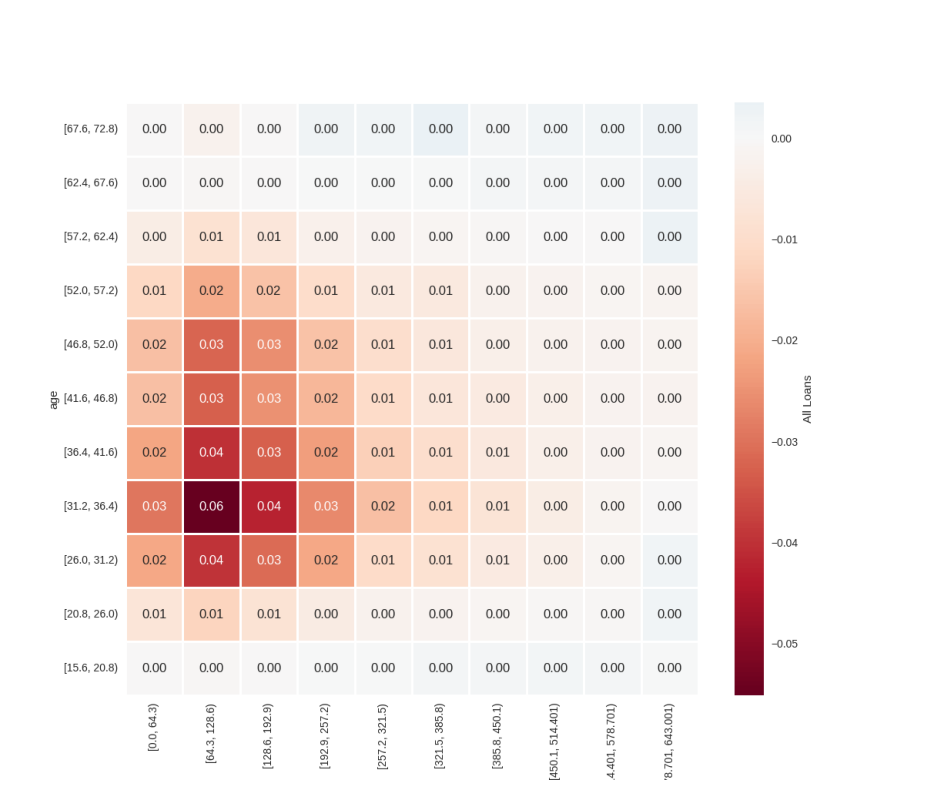

{'closure': 0.30386607175114655, 'proximity': 0.2655340706016932, 'symmetry': 0.24262907339035517, 'overlap': 0.23809523809523814}


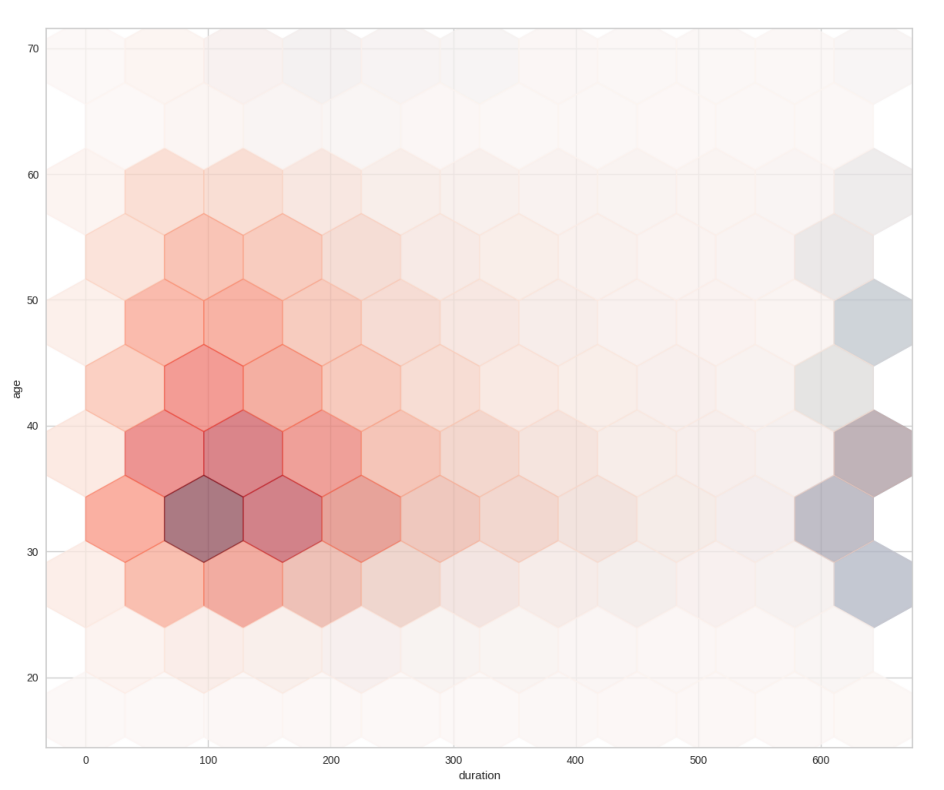

{'closure': 0.19678769148798894, 'proximity': 0.33189361314684673, 'symmetry': 0.30199897951427424, 'overlap': 0.28313145620557434}


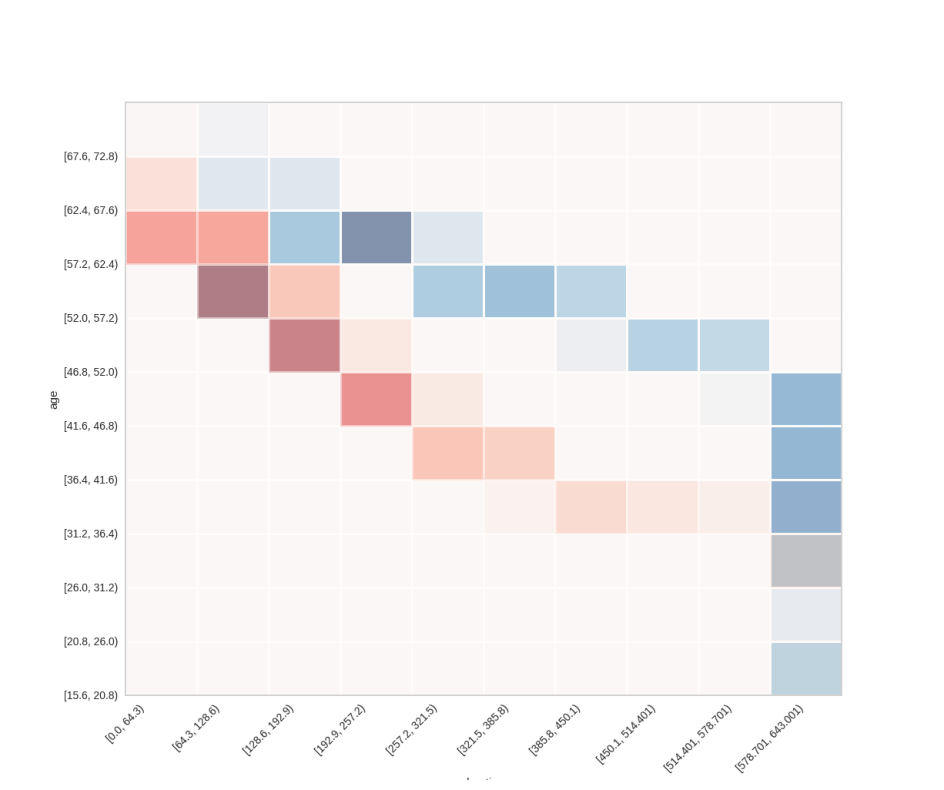

{'closure': 0.13836381194984795, 'proximity': 0.30694421419425866, 'symmetry': 0.18143834498542075, 'overlap': 0.7894736842105263}


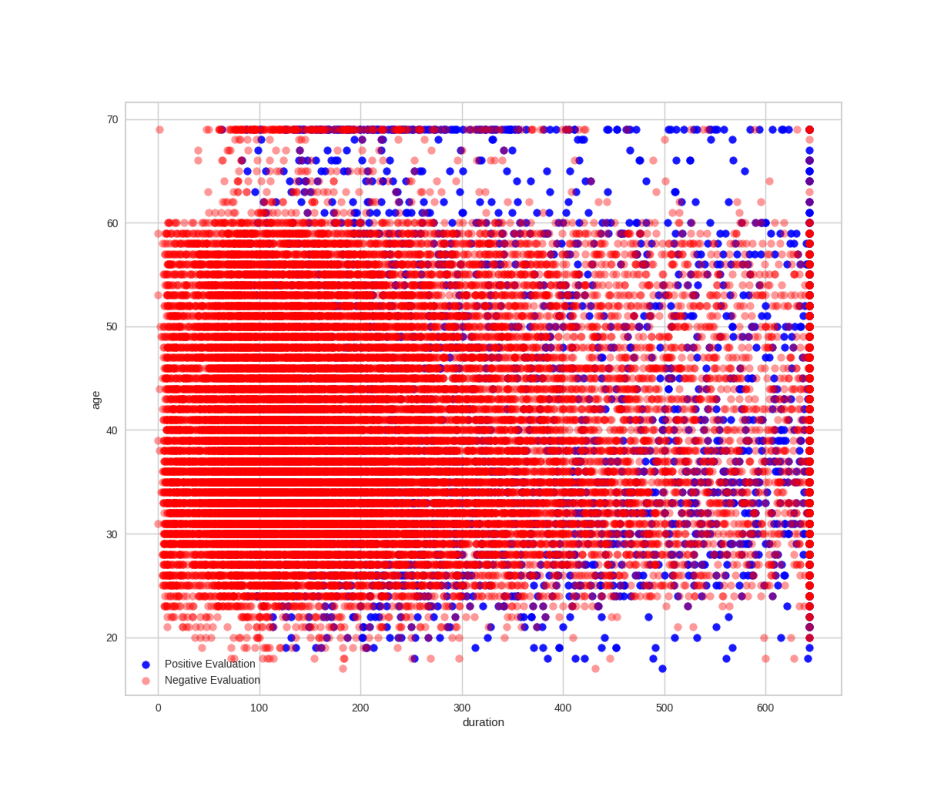

{'closure': 0.06346464588032609, 'proximity': 0.5764514713119799, 'symmetry': 0.6181776679941361, 'overlapping': 0.14525587892361147}


<Figure size 800x550 with 0 Axes>

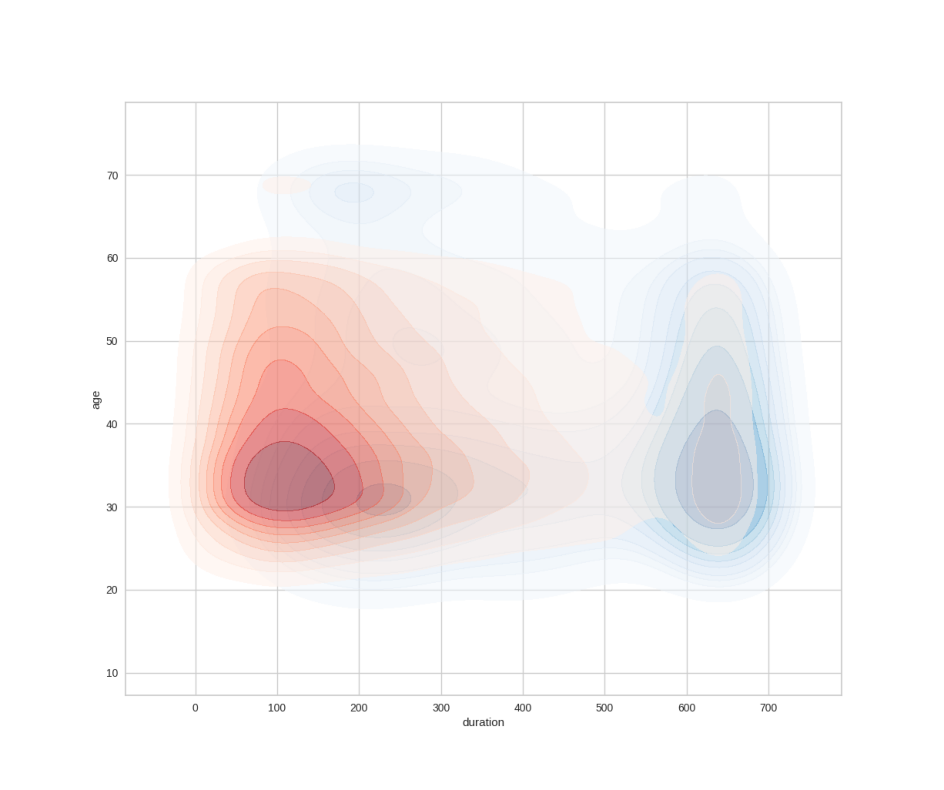

{'closure': 0.5350785485685808, 'proximity': 0.29369862835100896, 'symmetry': 0.29093446587741195, 'overlap': 0.39460325562928933}


In [16]:
viz2 = DataViz2(df)
# Create a dictionary to save the metrics
metrics_list = []

# Execute the heatmap and save the metrics in the dictionary
heatmap_metrics = viz2.heatmap(feature1, feature2)
metrics_list.append(['heatmap.png', np.array(heatmap_metrics)])

# Execute the hexbin plot and save the metrics in the dictionary
hexbin_metrics = viz2.hexbin_plot(feature1, feature2)
metrics_list.append(['hexbin.png', np.array(hexbin_metrics)])

# Execute the histogram and save the metrics in the dictionary
histogram_metrics = viz2.histogram(feature1, feature2)
metrics_list.append(['histogram.png', np.array(histogram_metrics)])

# Execute the scatter plot and save the metrics in the dictionary
scatter_plot_metrics = viz2.scatter_plot(feature1, feature2)
metrics_list.append(['scatter.png', np.array(scatter_plot_metrics)])

# Execute the KDE plot and save the metrics in the dictionary
kde_plot_metrics = viz2.kde_plot(feature1, feature2)
metrics_list.append(['kde.png', np.array(kde_plot_metrics)])

metrics_dict = np.empty((len(metrics_list), 2), dtype=object)
for i in range(len(metrics_list)):
    metrics_dict[i, 0] = metrics_list[i][0]
    metrics_dict[i, 1] = metrics_list[i][1]

# **MAPS elites**

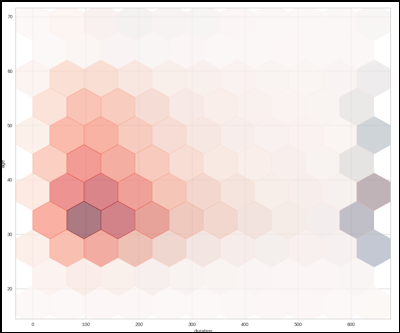

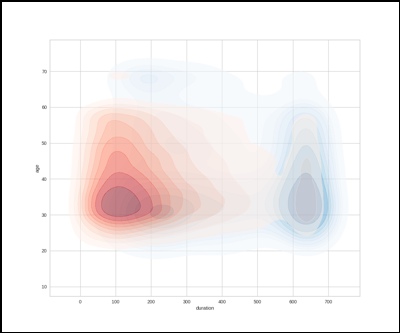

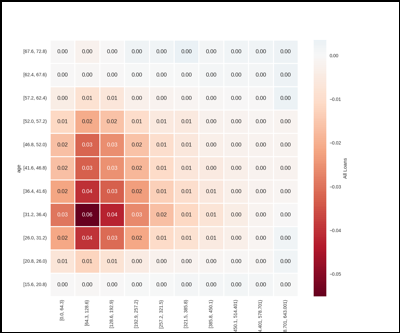

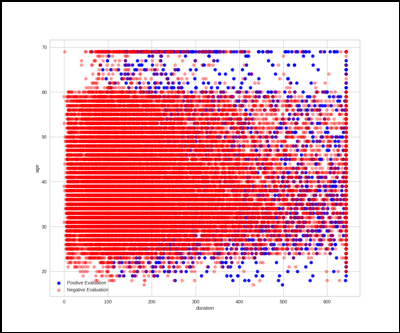

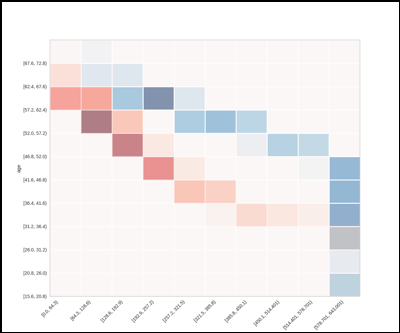

In [17]:
# Check if coefficients file already exists
if Path('best_coeff.npy').is_file():
    coefficients = np.load('best_coeff.npy', allow_pickle=True)
else:
    coefficients = np.ones(len(metrics_dict[0, 1]))
    matrix = np.empty((0, 3), dtype=object)
    np.save('metrics_matrix.npy', matrix)

order = np.zeros(metrics_dict.shape[0])
np.save('order.npy', order)

image_value = []
for i in range(metrics_dict.shape[0]):
    image_value.append(np.dot(metrics_dict[i, 1], coefficients))
image_value = np.array(image_value).T
image_value = image_value.reshape(-1, 1)

image_order = np.concatenate((metrics_dict, image_value), axis=1)

# Sort the new list by score, from the one with the highest value to the lowest
image_order = sorted(image_order, key=lambda x: x[2], reverse=True)
np.save('image_order.npy', image_order)

# Border width
border_width = 2

# New dimensions of the images
# Create a function to resize and add a border to an image
def resize_and_add_border(image_path):
    # Open the image with PIL and resize
    original_image = PILImage.open(image_path)
    new_width = original_image.size[0] // 3
    new_height = original_image.size[1] // 3

    resized_image = original_image.resize((new_width, new_height))

    # Add the border using ImageDraw
    draw = ImageDraw.Draw(resized_image)
    draw.rectangle([0, 0, new_width, new_height], outline='black', width=border_width)

    # Save the resized image with the border to a buffer
    image_buffer = io.BytesIO()
    resized_image.save(image_buffer, format='PNG')

    # Return the binary data of the image
    return image_buffer.getvalue()

def on_image_click(path):

    order = np.load('order.npy')

    if path == image_path[0]:
        order[0] = (math.sqrt(np.sum(order) * 8 + 1) - 1) / 2 + 1
        button_widgets[0].children[0].disabled = True
        np.save('order.npy', order)
    elif path == image_path[1]:
        order[1] = (math.sqrt(np.sum(order) * 8 + 1) - 1) / 2 + 1
        button_widgets[1].children[0].disabled = True
        np.save('order.npy', order)
    elif path == image_path[2]:
        order[2] = (math.sqrt(np.sum(order) * 8 + 1) - 1) / 2 + 1
        button_widgets[2].children[0].disabled = True
        np.save('order.npy', order)
    elif path == image_path[3]:
        order[3] = (math.sqrt(np.sum(order) * 8 + 1) - 1) / 2 + 1
        button_widgets[3].children[0].disabled = True
        np.save('order.npy', order)
    elif path == image_path[4]:
        order[4] = (math.sqrt(np.sum(order) * 8 + 1) - 1) / 2 + 1
        button_widgets[4].children[0].disabled = True
        np.save('order.npy', order)
    display(Image(data=resize_and_add_border(path), format='png'))

# Event handling function for the click on the second button
def on_second_button_click(b):
    for i in range(len(button_widgets)):
        button_widgets[i].children[0].disabled = False
        clear_output()
        display(widgets.HBox(button_widgets))
        order = np.zeros(metrics_dict.shape[0])
        np.save('order.npy', order)

# Event handling function for the click on the third button
def on_third_button_click(b):
    order = np.load('order.npy')
    if np.sum(order) == (order.size) * (order.size + 1) / 2:
        b.disabled = True
        button2.disabled = True

        # Converts the list of lists to an array of arrays
        image_order = np.load('image_order.npy', allow_pickle=True)
        image_order = np.delete(image_order, 0, 1)
        image_order = np.delete(image_order, 1, 1)
        arr=[]
        for i in range(image_order.shape[0]):
          row = np.concatenate(image_order[i], axis=0)
          arr.append(row)
        arr=np.array(arr)
        order = order.reshape(-1, 1)
        arr = np.append(arr, order, axis=1)
        idx = np.lexsort((arr[:, 3], arr[:, 2], arr[:, 1], arr[:, 0]))
        sorted_arr = arr[idx]
        find = False
        matrix = np.load('metrics_matrix.npy', allow_pickle=True)
        for i in range(matrix.shape[0]):
            index = np.where(np.all(matrix[:, 1][i] == np.array(sorted_arr[:, :-1])))
            if len(index[0]) > 0:
                find = True
                matrix[i, 2] = matrix[i, 2] + sorted_arr[:, -1]
                break
        if not find:
            new_row = [matrix.shape[0]+1, np.concatenate(sorted_arr[:, :-1]).reshape(5, 4), sorted_arr[:, -1]]
            row_metrics = np.empty((1, 3), dtype=object)
            row_metrics[0] = new_row
            matrix = np.vstack((matrix, row_metrics))

        np.save('metrics_matrix.npy', matrix)
    else:
        print(order)
        print("Please complete the choices")

# Create button widgets with images
button_widgets = []
arr = np.array(image_order)
image_path = arr[:, 0]
for path in image_path:
    image_data = resize_and_add_border(path)
    image = PILImage.open(io.BytesIO(image_data))
    width, height = image.size
    image_html = f'<img src="data:image/png;base64,{base64.b64encode(image_data).decode()}" width="{width}" height="{height}">'

    button = widgets.Button(description='Select', layout=widgets.Layout(width=f'{width}px', height=f'{50}px', text_align='left'))
    output = widgets.Output()
    with output:
        display(Image(data=image_data, format='png'))
    button.on_click(lambda event, output=output, path=path: [output.clear_output(wait=True), on_image_click(path)])

    button_widgets.append(widgets.VBox([button, output]))

# Show buttons with images
button2 = widgets.Button(description='Delete', layout=widgets.Layout(width='75px', height='40px', text_align='left'))
button2.on_click(on_second_button_click)
output = widgets.Output()
button3 = widgets.Button(description='OK', layout=widgets.Layout(width='75px', height='40px', text_align='left'))
button3.on_click(on_third_button_click)
output = widgets.Output()
button_widgets.append(widgets.VBox([button2, output]))
button_widgets.append(widgets.VBox([button3, output]))
display(widgets.HBox(button_widgets))

In [25]:
#np.save('matrix.npy', matrix)

CONFIG = {
    "map_elites": {
        "dim": 4,
        "iters": 500,
        "archive_dims": (500, 500),
        "use_result_archive": True,
        "is_dqd": True,
        "batch_size": 20,
        "archive": {
            "class": GridArchive,
            "kwargs": {
                "threshold_min": -np.inf
            }
        },
        "emitters": [{
            "class": EvolutionStrategyEmitter,
            "kwargs": {
                "sigma0": 0.5,
                "ranker": "2rd",
                "selection_rule": "filter",
                "restart_rule": "no_improvement"
            },
            "num_emitters": 15
        }],
        "scheduler": {
            "class": Scheduler,
            "kwargs": {}
        }
    }
}


In [26]:
# Defining the fit function which takes a batch of solutions as input
def fit(solution_batch):
    # Loading a precomputed metrics matrix from a file
    matrix = np.load('metrics_matrix.npy', allow_pickle=True)

    # Extracting dimensions from the metrics matrix
    n_dataset, n_graph, dim = matrix.shape[0], matrix[0, 1].shape[0], matrix[0, 1].shape[1]

    # Initializing variables for tracking results
    find_sol = False
    measure = []
    objective = []
    max_valid=0

    # Loop over each solution in the batch
    for _, coeff in enumerate(solution_batch):
        # Initializing variables for tracking combinations and valid solutions
        combinations_value = 0
        valid_solution_count = 0

        # Looping over each dataset
        for j in range(n_dataset):
            # Combining two matrices and sorting them based on the last column
            arr = np.append(matrix[j, 1], matrix[j, 2].reshape(-1, 1), axis=1)
            idx = np.argsort(arr[:, 4])
            arr_sorted = arr[idx]

            # Compute linear combinations and check for partial order satisfaction
            combinations = np.dot(arr_sorted[:, :-1], np.array(coeff - 5).T)

            for k in range(n_graph - 1):
                # Check if only partial order is satisfied (first element at the top position)
                if combinations[k] == np.max(combinations[-n_graph + k:]):
                    combinations_value += n_graph * 2 - k * 2
                elif k == 0:
                    combinations_value = 0.1  # If the first element is not at the top, set a default value

            # Counting valid solutions
            if combinations_value != 0:
                valid_solution_count += 1

        # Update maximum valid solutions count
        if valid_solution_count > max_valid:
            max_valid = valid_solution_count

        # Updating the find_sol variable based on the ratio of valid solutions
        find_sol = find_sol or ((valid_solution_count / n_dataset) > 0.9)

        # Computing mean and standard deviation of the coefficients
        mean_coeff = np.mean(coeff)
        std_coeff = np.std(coeff)

        # Appending results to the measure and objective lists
        measure.append((mean_coeff, std_coeff))
        objective.append(combinations_value)

    # If no valid solutions are found, print a message and exit
    if not find_sol:
        print('There are no solutions, please review metrics value!')
        raise SystemExit

    # Returning the results as NumPy arrays
    return np.array(objective), np.array(measure)

In [27]:
def create_scheduler(config, algorithm, seed=None):
    solution_dim = config["dim"]
    archive_dims = config["archive_dims"]
    learning_rate = 0.1 if "learning_rate" not in config["archive"][
        "kwargs"] else config["archive"]["kwargs"]["learning_rate"]
    use_result_archive = config["use_result_archive"]
    bounds = [(0.001, 1.), (0.001, 1.)]
    bounds_emitter = [(0.001, 10.), (0.001, 10.), (0.001, 10.), (0.001, 10.)]
    initial_coeff = np.ones(solution_dim)
    mode = "batch"

    # Create archive.
    archive_class = config["archive"]["class"]
    if archive_class == GridArchive:
        archive = archive_class(solution_dim=solution_dim,
                                ranges=bounds,
                                dims=archive_dims,
                                seed=seed,
                                **config["archive"]["kwargs"])

    else:
        archive = archive_class(solution_dim=solution_dim,
                                ranges=bounds,
                                seed=seed,
                                **config["archive"]["kwargs"])

    # Create result archive.
    result_archive = None
    if use_result_archive:
        result_archive = GridArchive(solution_dim=solution_dim,
                                     dims=archive_dims,
                                     ranges=bounds,
                                     seed=seed)

    # Create emitters. Each emitter needs a different seed so that they do not
    # all do the same thing, hence we create an rng here to generate seeds. The
    # rng may be seeded with None or with a user-provided seed.
    seed_sequence = np.random.SeedSequence(seed)
    emitters = []
    for e in config["emitters"]:
        emitter_class = e["class"]
        emitters += [
            emitter_class(
                archive,
                x0=initial_coeff,
                bounds=bounds_emitter,
                **e["kwargs"],
                batch_size=config["batch_size"],
                seed=s,
            ) for s in seed_sequence.spawn(e["num_emitters"])
        ]
    # Create Scheduler
    scheduler_class = config["scheduler"]["class"]
    scheduler = scheduler_class(archive,
                                emitters,
                                result_archive=result_archive,
                                add_mode=mode,
                                **config["scheduler"]["kwargs"])
    scheduler_name = scheduler.__class__.__name__

    print(f"Create {scheduler_name} for {algorithm} with learning rate "
          f"{learning_rate} and add mode {mode}, using solution dim "
          f"{solution_dim}, archive dims {archive_dims}, and "
          f"{len(emitters)} emitters.")

    return scheduler


In [28]:
def save_heatmap(archive, heatmap_path):

    if isinstance(archive, GridArchive):
        plt.figure(figsize=(8, 6))
        grid_archive_heatmap(archive, vmin=0, vmax=100)
        plt.tight_layout()
        plt.savefig(heatmap_path)
    elif isinstance(archive, CVTArchive):
        plt.figure(figsize=(16, 12))
        cvt_archive_heatmap(archive, vmin=0, vmax=100)
        plt.tight_layout()
        plt.savefig(heatmap_path)
    plt.close(plt.gcf())
    return

In [29]:
#def main
algorithm = "map_elites"
dim=None
itrs=None
archive_dims=None
learning_rate=None
es=None
outdir="coeff_output"
log_freq=250
seed=None
config = copy.deepcopy(CONFIG["map_elites"])
print('config', config)

# Use default dim for each algorithm.
if dim is not None:
    config["dim"] = dim

# Use default itrs for each algorithm.
if itrs is not None:
    config["iters"] = itrs

# Use default archive_dim for each algorithm.
if archive_dims is not None:
    config["archive_dims"] = archive_dims

# Use default learning_rate for each algorithm.
if learning_rate is not None:
    config["archive"]["kwargs"]["learning_rate"] = learning_rate

name = f"{algorithm}_{config['dim']}"
outdir = Path(outdir)
if not outdir.is_dir():
    outdir.mkdir()

scheduler = create_scheduler(config, algorithm, seed=seed)
result_archive = scheduler.result_archive
is_dqd = config["is_dqd"]
itrs = config["iters"]
metrics = {
    "QD Score": {
        "x": [0],
        "y": [0.0],
    },
    "Archive Coverage": {
        "x": [0],
        "y": [0.0],
    },
}

non_logging_time = 0.0
save_heatmap(result_archive, str(outdir / f"{name}_heatmap_{0:05d}.png"))

existing_coefficients = None  # Assume no existing coefficients at the beginning

# Check if coefficients file already exists
coefficients_file_path = outdir / f"{name}_existing_coefficients.txt"
if coefficients_file_path.exists():
    # Read existing coefficients from file
    with coefficients_file_path.open("r") as existing_coeff_file:
        existing_coefficients = [list(map(float, line.split())) for line in existing_coeff_file.readlines()]

# Use existing coefficients if available, otherwise generate new ones
initial_coefficients = existing_coefficients or np.ones(dim)  # Assuming dim is the dimension of the coefficients


for itr in tqdm.trange(1, itrs + 1):
    itr_start = time.time()

    # Call your fit function to get objective values, measures, and diversity measure.
    solution_batch = scheduler.ask()

    objective_batch, measure_batch = fit(solution_batch)

    # Call tell to provide feedback on the evaluated solutions
    scheduler.tell(objective_batch, measure_batch)

    # Record the QD Score in the metrics dictionary.
    # Logging and output.
    final_itr = itr == itrs
    if itr % log_freq == 0 or final_itr:
        if final_itr:
            result_archive.data(return_type='pandas'
            ).to_csv(outdir / f"{name}_archive.csv")

        # Record the QD Score in the metrics dictionary.
        metrics["QD Score"]["x"].append(itr)
        metrics["QD Score"]["y"].append(result_archive.stats.qd_score)
        metrics["Archive Coverage"]["x"].append(itr)
        metrics["Archive Coverage"]["y"].append(
            result_archive.stats.coverage)
        tqdm.tqdm.write(
            f"Iteration {itr} | Archive Coverage: "
            f"{metrics['Archive Coverage']['y'][-1] * 100:.3f}% "
            f"QD Score: {metrics['QD Score']['y'][-1]:.3f}")

        save_heatmap(result_archive,
                      str(outdir / f"{name}_heatmap_{itr:05d}.png"))
print(result_archive.best_elite["solution"]-5)
np.save('best_coeff.npy', result_archive.best_elite["solution"]-5)
# Plot metrics.
print(f"Algorithm Time (Excludes Logging and Setup): {non_logging_time}s")
for metric, values in metrics.items():
    plt.plot(values["x"], values["y"])
    plt.title(metric)
    plt.xlabel("Iteration")
    plt.savefig(
        str(outdir / f"{name}_{metric.lower().replace(' ', '_')}.png"))
    plt.clf()
with (outdir / f"{name}_metrics.json").open("w") as file:
    json.dump(metrics, file, indent=2)

config {'dim': 4, 'iters': 500, 'archive_dims': (500, 500), 'use_result_archive': True, 'is_dqd': True, 'batch_size': 20, 'archive': {'class': <class 'ribs.archives._grid_archive.GridArchive'>, 'kwargs': {'threshold_min': -inf}}, 'emitters': [{'class': <class 'ribs.emitters._evolution_strategy_emitter.EvolutionStrategyEmitter'>, 'kwargs': {'sigma0': 0.5, 'ranker': '2rd', 'selection_rule': 'filter', 'restart_rule': 'no_improvement'}, 'num_emitters': 15}], 'scheduler': {'class': <class 'ribs.schedulers._scheduler.Scheduler'>, 'kwargs': {}}}
Create Scheduler for map_elites with learning rate 0.1 and add mode batch, using solution dim 4, archive dims (500, 500), and 15 emitters.



 50%|████▉     | 249/500 [00:13<00:11, 21.93it/s]

 50%|████▉     | 249/500 [00:13<00:11, 21.93it/s]

Iteration 250 | Archive Coverage: 14.524% QD Score: 338238.200



100%|█████████▉| 498/500 [00:26<00:00, 21.70it/s]

100%|█████████▉| 498/500 [00:27<00:00, 21.70it/s]

Iteration 500 | Archive Coverage: 26.009% QD Score: 604575.600


100%|██████████| 500/500 [00:28<00:00, 17.67it/s]


[-2.92829189 -4.47546359 -2.25361401 -3.32731227]
Algorithm Time (Excludes Logging and Setup): 0.0s


<Figure size 800x550 with 0 Axes>

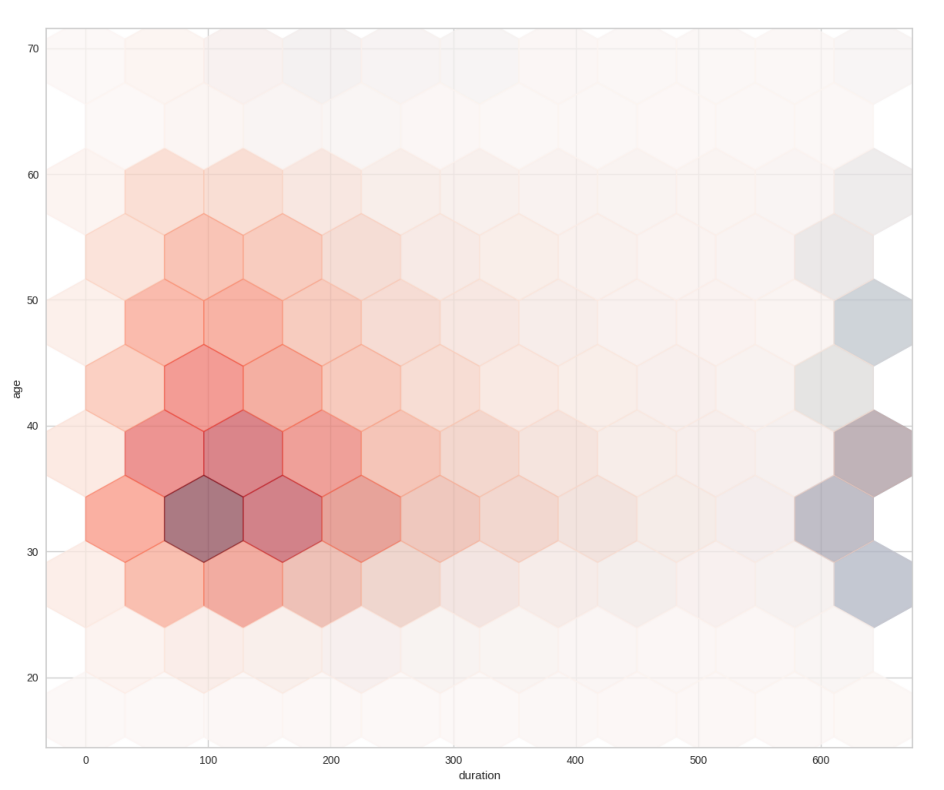

In [30]:
# Print the best graph according to your preferences

# Check if coefficients file already exists
if Path('best_coeff.npy').is_file():
    coefficients = np.load('best_coeff.npy', allow_pickle=True)

    order = np.zeros(metrics_dict.shape[0])
    np.save('order.npy', order)

    image_value = []
    for i in range(metrics_dict.shape[0]):
        image_value.append(np.dot(metrics_dict[i, 1], coefficients))
    image_value = np.array(image_value).T
    image_value = image_value.reshape(-1, 1)

    image_order = np.concatenate((metrics_dict, image_value), axis=1)

    # The new list is sorted according to score, from the one with the highest to the lowest value
    image_order = sorted(image_order, key=lambda x: x[2], reverse=True)

    image = imageio.imread(image_order[0][0])
    fig, ax = plt.subplots(figsize=(12, 10))

    # View image
    ax.imshow(image)
    ax.axis('off')  # Hide the axes
    plt.show()
else:
    print('Sorry, there are no previous choices')

# **Testing**

In [ ]:
####### USED ONLY FOR EXEMPLE #########
import joblib
model = joblib.load('model.joblib')
df = pd.read_csv('trial_dataset.csv')
feature1 = 'Age'
target_column = 'Loan Approval'
#######################################

# Create a histogram of the data
fig = px.histogram(df, x=feature1, color=target_column)

# Define the Dash app
app = Dash(__name__)

# Variable to store selected data
selected_data = None

# Layout of the app
app.layout = html.Div([
    dcc.Graph(figure=fig, id='histogram-plot'),
    html.Div(id='selected-data-output'),
])

# Callback to update the selected data
@app.callback(
    Output('selected-data-output', 'children'),
    [Input('histogram-plot', 'selectedData')],
    [State('selected-data-output', 'children')]
)
def display_selected_data(selectedData, current_output):
    global selected_data

    if selectedData is not None:
        selected_range = selectedData['range']['x']
        selected_data = df[(df[feature1] >= selected_range[0]) & (df[feature1] <= selected_range[1])]
        fig_sel = px.histogram(selected_data, x=feature1, color=target_column)
        fig_sel.show()
        return f'Selected data: {selected_data.to_dict(orient="records")}'
    else:
        return 'No data selected'

# Run the app
app.run_server(mode='inline')

In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

mean = selected_data.mean()
std = selected_data.std()
index_sel = selected_data.index
def perturb(x, mean, std, factor):
  # This function adds random noise to the x series, keeping the mean and std value the same
  # The factor parameter controls the amplitude of the noise, the higher it is the bigger the noise
  noise = np.random.normal(0, std * factor, size=len(x))
  return x + noise - (noise.mean() - mean)

gender_modified = []
for i in range(df.shape[0]):
    gender_modified.append(1 - df['Gender'].iloc[i])
gender_modified = pd.DataFrame(gender_modified) #, columns=['Gender_n'])
# Assuming 'target_column' is the name of your target column
X_modified = df.drop(columns=[target_column])
X_modified['Gender'] = gender_modified
X_modified.to_csv('Xmodified.csv',index=False)
y_modified = model.predict(X_modified)
y_modified = pd.DataFrame(y_modified, columns=[target_column])
y_modified.to_csv('ymodified.csv',index=False)
X_modified['Loan Approval'] = y_modified

category_order = ["blue", "red"]

# Creates side-by-side histogram charts with equal y-axis
fig1 = px.histogram(df.iloc[index_sel],
                    x=feature1,
                    color=target_column,
                    color_discrete_map={0: "red", 1: "blue"},
                    category_orders={target_column: [1, 0], 'color': category_order})
fig2 = px.histogram(X_modified.iloc[index_sel],
                    x=feature1,
                    color=target_column,
                    color_discrete_map={0: "red", 1: "blue"},
                    category_orders={target_column: [1, 0], 'color': category_order})

# Mostra la figura
fig1.show()
fig2.show()
